## Модель для выявления диабета

### Импорт библиотек

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import auc, ConfusionMatrixDisplay, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import time
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.decomposition import PCA
from xgboost import plot_tree as xgb_plot_tree

import os
import joblib
import json

### Загрузка данных

In [9]:
# Загрузка данных
file_path = "data/diabetes_binary_health_indicators.csv"

start_time = time.time()  # Начало замера времени загрузки данных
df = pd.read_csv(file_path)
end_time = time.time()  # Конец замера времени загрузки данных
# Вывод времени загрузки данных
print(f"\n Время загрузки данных: {end_time - start_time:.4f} секунд")


 Время загрузки данных: 0.2322 секунд


### Предварительный анализ данных

In [10]:
# Первые строки датасета
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0 

In [11]:
# Первые строки датасета
print("Первые 5 строк данных:")
display(df.head())

Первые 5 строк данных:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
# Размер датасета
print(f"\n Размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")


 Размер датасета: 253680 строк, 22 колонок


In [13]:
# Информация о типах данных и пропусках
start_time = time.time()  # Начало замера времени получения информации о колонках
print("\nИнформация о колонках:")
display(df.info())
end_time = time.time()  # Конец замера времени
print(f"Время получения информации о колонках: {end_time - start_time:.4f} секунд")


Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680

None

Время получения информации о колонках: 0.0243 секунд


Все признаки имеют тип float64, что упрощает предварительную обработку данных.

In [14]:
# Статистический обзор числовых признаков
start_time = time.time()  # Начало замера времени для describe()
print("\nОписательная статистика:")
display(df.describe())
end_time = time.time()  # Конец замера времени
print(f"Время получения описательной статистики: {end_time - start_time:.4f} секунд")


Описательная статистика:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Время получения описательной статистики: 0.1660 секунд


In [15]:
# Проверка на пропущенные значения
start_time = time.time()  # Начало замера времени проверки пропущенных значений
print("\nПропущенные значения:")
display(df.isnull().sum())
end_time = time.time()  # Конец замера времени
print(f"Время проверки пропущенных значений: {end_time - start_time:.4f} секунд")


Пропущенные значения:


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Время проверки пропущенных значений: 0.0109 секунд


 Пропущенных значений нет, что исключает необходимость дополнительных шагов по их обработке и ускоряет последующую работу с данными.

Информация о признаках и их значимости для предсказания целевой переменной.

In [16]:
# Распределение целевой переменной
print("\nРаспределение целевой переменной Diabetes_binary:")
print(df['Diabetes_binary'].value_counts())

display(df['Diabetes_binary'].value_counts(normalize=True).round(3))


Распределение целевой переменной Diabetes_binary:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


Diabetes_binary
0.0    0.861
1.0    0.139
Name: proportion, dtype: float64

Целевая переменная сильно несбалансирована: только 13.9% случаев с диабетом. Это важно учитывать при выборе моделей и метрик оценки (например, Recall, F1-score вместо Accuracy).

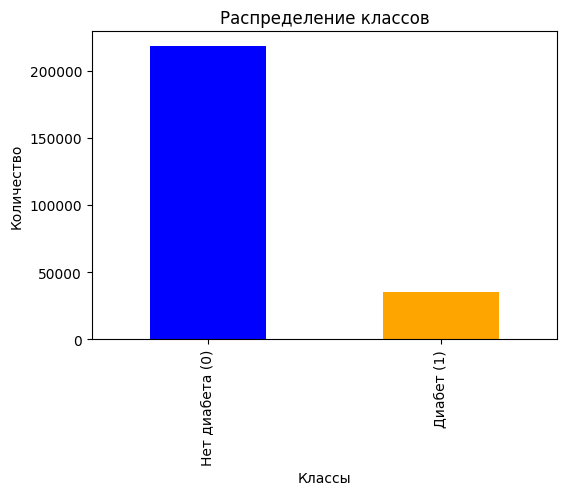

In [17]:
# Визуализация распределения
plt.figure(figsize=(6, 4))
df['Diabetes_binary'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Распределение классов")
plt.xlabel("Классы")
plt.ylabel("Количество")
plt.xticks([0, 1], ['Нет диабета (0)', 'Диабет (1)'])
plt.show()

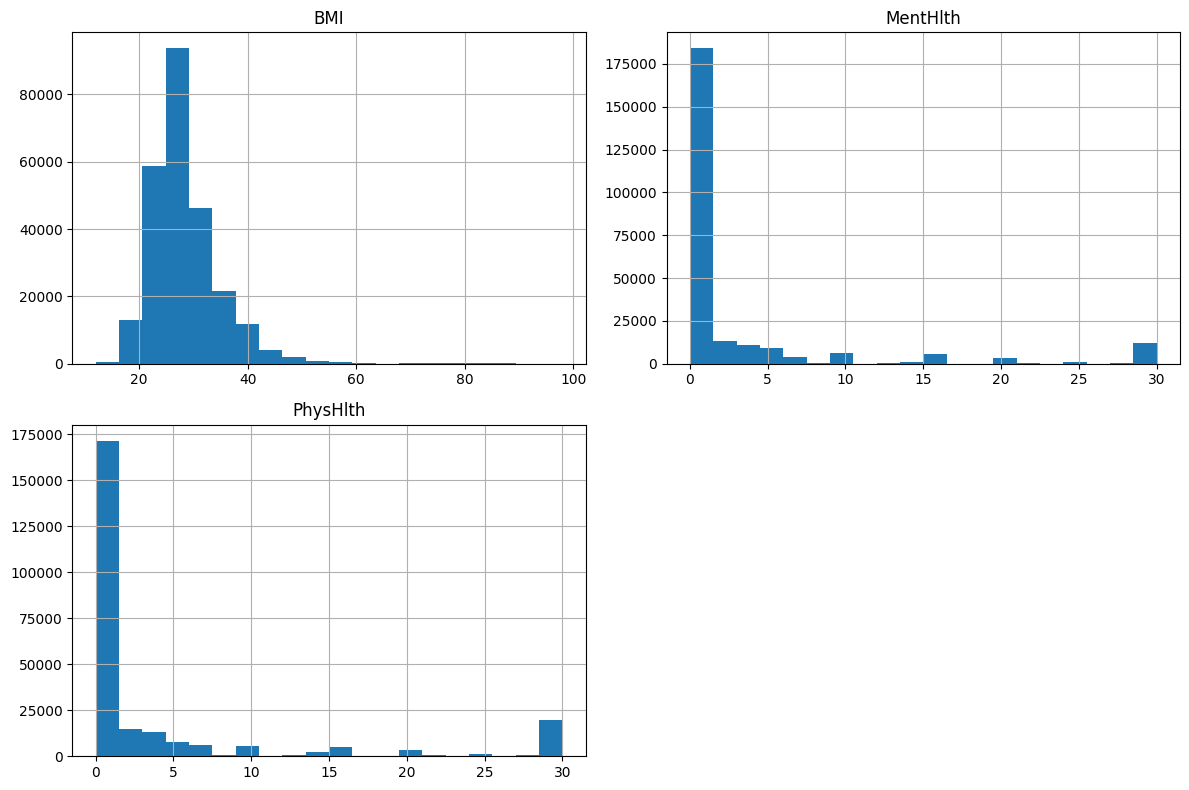

In [18]:
# Гистограммы для числовых признаков
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [19]:
# Вывод случайных строк для визуального представления структуры
print("\n Несколько случайных строк из набора:")
display(df.sample(5, random_state=42))


 Несколько случайных строк из набора:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


Выводы по предварительному анализу данных
- Датасет содержит 21 колонку и большое количество строк.
- Все признаки являются числовыми, что упрощает дальнейшую обработку.
- Пропущенных значений в данных нет, что исключает необходимость их заполнения.
- Целевая переменная 'Diabetes_binary' имеет несбалансированное распределение (класс '0' преобладает).
- Временные затраты на загрузку данных и анализ составляют доли секунды, что подтверждает эффективность процесса.

### Проверка атрибутов. преобразование признаков

In [20]:
# Проверка типов данных
print(df.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


здесь действий не требуется, потому что:

Все признаки в этом датасете уже в числовом виде.

Это либо бинарные переменные (0 или 1), либо категориальные, закодированные числами (например, GenHlth, Age, Education, Income).

Текста, изображений, аудио или видео здесь нет — значит, векторизация или извлечение фичей не нужны.

In [21]:
# Проверка минимальных и максимальных значений для каждого признака
print("\nМинимальные и максимальные значения признаков:")
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"- {column}: Минимум = {min_val}, Максимум = {max_val}")


Минимальные и максимальные значения признаков:
- Diabetes_binary: Минимум = 0.0, Максимум = 1.0
- HighBP: Минимум = 0.0, Максимум = 1.0
- HighChol: Минимум = 0.0, Максимум = 1.0
- CholCheck: Минимум = 0.0, Максимум = 1.0
- BMI: Минимум = 12.0, Максимум = 98.0
- Smoker: Минимум = 0.0, Максимум = 1.0
- Stroke: Минимум = 0.0, Максимум = 1.0
- HeartDiseaseorAttack: Минимум = 0.0, Максимум = 1.0
- PhysActivity: Минимум = 0.0, Максимум = 1.0
- Fruits: Минимум = 0.0, Максимум = 1.0
- Veggies: Минимум = 0.0, Максимум = 1.0
- HvyAlcoholConsump: Минимум = 0.0, Максимум = 1.0
- AnyHealthcare: Минимум = 0.0, Максимум = 1.0
- NoDocbcCost: Минимум = 0.0, Максимум = 1.0
- GenHlth: Минимум = 1.0, Максимум = 5.0
- MentHlth: Минимум = 0.0, Максимум = 30.0
- PhysHlth: Минимум = 0.0, Максимум = 30.0
- DiffWalk: Минимум = 0.0, Максимум = 1.0
- Sex: Минимум = 0.0, Максимум = 1.0
- Age: Минимум = 1.0, Максимум = 13.0
- Education: Минимум = 1.0, Максимум = 6.0
- Income: Минимум = 1.0, Максимум = 8.0


На основе предоставленных минимальных и максимальных значений признаков видно, что данные находятся в ожидаемых диапазонах. Это подтверждает корректность данных

### Описательный анализ данных

1. Шкалы измерения признаков

In [22]:
# Определение числовых и категориальных признаков
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']  # Числовые признаки
categorical_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

In [23]:
# Определение шкалы измерения для каждого признака
scale_mapping = {
    'Diabetes_binary': 'номинальная',  # 0, 1, 2 — категории без порядка
    'HighBP': 'номинальная',           # 0, 1 — категории без порядка
    'HighChol': 'номинальная',         # 0, 1 — категории без порядка
    'CholCheck': 'номинальная',        # 0, 1 — категории без порядка
    'BMI': 'числовая',                 # количественный признак
    'Smoker': 'номинальная',           # 0, 1 — категории без порядка
    'Stroke': 'номинальная',           # 0, 1 — категории без порядка
    'HeartDiseaseorAttack': 'номинальная',  # 0, 1 — категории без порядка
    'PhysActivity': 'номинальная',     # 0, 1 — категории без порядка
    'Fruits': 'номинальная',           # 0, 1 — категории без порядка
    'Veggies': 'номинальная',          # 0, 1 — категории без порядка
    'HvyAlcoholConsump': 'номинальная',# 0, 1 — категории без порядка
    'AnyHealthcare': 'номинальная',    # 0, 1 — категории без порядка
    'NoDocbcCost': 'номинальная',      # 0, 1 — категории без порядка
    'GenHlth': 'порядковая',           # 1–5 — категории с логическим порядком
    'MentHlth': 'числовая',            # количественный признак (дни)
    'PhysHlth': 'числовая',            # количественный признак (дни)
    'DiffWalk': 'номинальная',         # 0, 1 — категории без порядка
    'Sex': 'номинальная',              # 0, 1 — категории без порядка
    'Age': 'порядковая',               # 1–13 — категории с логическим порядком
    'Education': 'порядковая',         # 1–6 — категории с логическим порядком
    'Income': 'порядковая'             # 1–8 — категории с логическим порядком
}

In [24]:
# Вывод результата
print("Шкала измерения для каждого признака:")
for feature, scale in scale_mapping.items():
    print(f"{feature}: {scale}")

Шкала измерения для каждого признака:
Diabetes_binary: номинальная
HighBP: номинальная
HighChol: номинальная
CholCheck: номинальная
BMI: числовая
Smoker: номинальная
Stroke: номинальная
HeartDiseaseorAttack: номинальная
PhysActivity: номинальная
Fruits: номинальная
Veggies: номинальная
HvyAlcoholConsump: номинальная
AnyHealthcare: номинальная
NoDocbcCost: номинальная
GenHlth: порядковая
MentHlth: числовая
PhysHlth: числовая
DiffWalk: номинальная
Sex: номинальная
Age: порядковая
Education: порядковая
Income: порядковая


 3. Проверка на выбросы и аномалии


Боксплоты для числовых признаков:


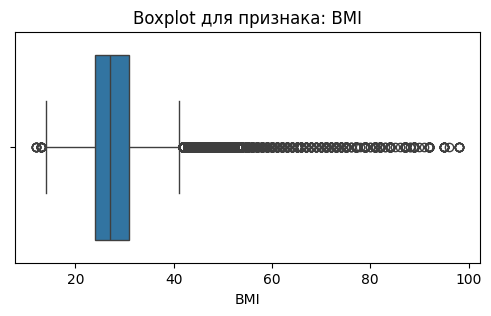

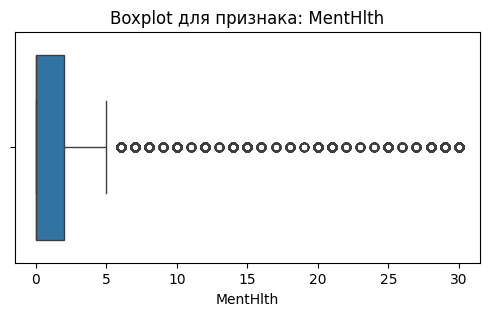

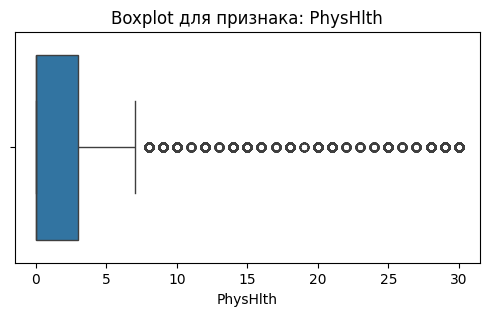

Время построения боксплотов: 0.9018 секунд


In [25]:
# Построение боксплотов для числовых признаков
start_time = time.time()  # Начало замера времени
print("\nБоксплоты для числовых признаков:")
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для признака: {col}")
    plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения боксплотов: {end_time - start_time:.4f} секунд")


BMI: Имеет широкий диапазон значений с множеством выбросов на высоких значениях. Это может быть связано с различиями в образе жизни, питании и генетике. Выбросы могут быть значимыми для задачи классификации, так как высокий BMI часто связан с повышенным риском диабета.


MentHlth и PhysHlth: Оба признака имеют схожее распределение, сосредоточенное вокруг низких значений (меньше 5 дней плохого состояния за месяц).

Удаление или замена выбросов может привести к потере полезной информации.


5. Проверка на нормальность

In [26]:
# Проверка нормальности
start_time = time.time()  # Начало замера времени
print("\nПроверка нормальности распределения числовых признаков:")
for feature in numerical_features:
    stat, p_value = shapiro(df[feature].dropna())
    print(f"{feature}: p-value = {p_value:.4f} {'(нормальное)' if p_value > 0.05 else '(не нормальное)'}")
end_time = time.time()  # Конец замера времени
print(f"Время проверки нормальности: {end_time - start_time:.4f} секунд")


Проверка нормальности распределения числовых признаков:
BMI: p-value = 0.0000 (не нормальное)
MentHlth: p-value = 0.0000 (не нормальное)
PhysHlth: p-value = 0.0000 (не нормальное)
Время проверки нормальности: 0.0190 секунд


d:\СКФУ\8 семестр\курсач\diabet\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253680.
  res = hypotest_fun_out(*samples, **kwds)


Многие реальные данные имеют ненормальное распределение. Например:

- BMI часто имеет длинный хвост справа из-за выбросов (люди с высоким весом).
- MentHlth и PhysHlth могут быть сосредоточены вокруг низких значений, так как большинство людей имеют хорошее здоровье.

Деревья решений не требуют нормального распределения данных. Они работают с порогами разбиения и могут обрабатывать ненормальные данные.

4. Распределения признаков

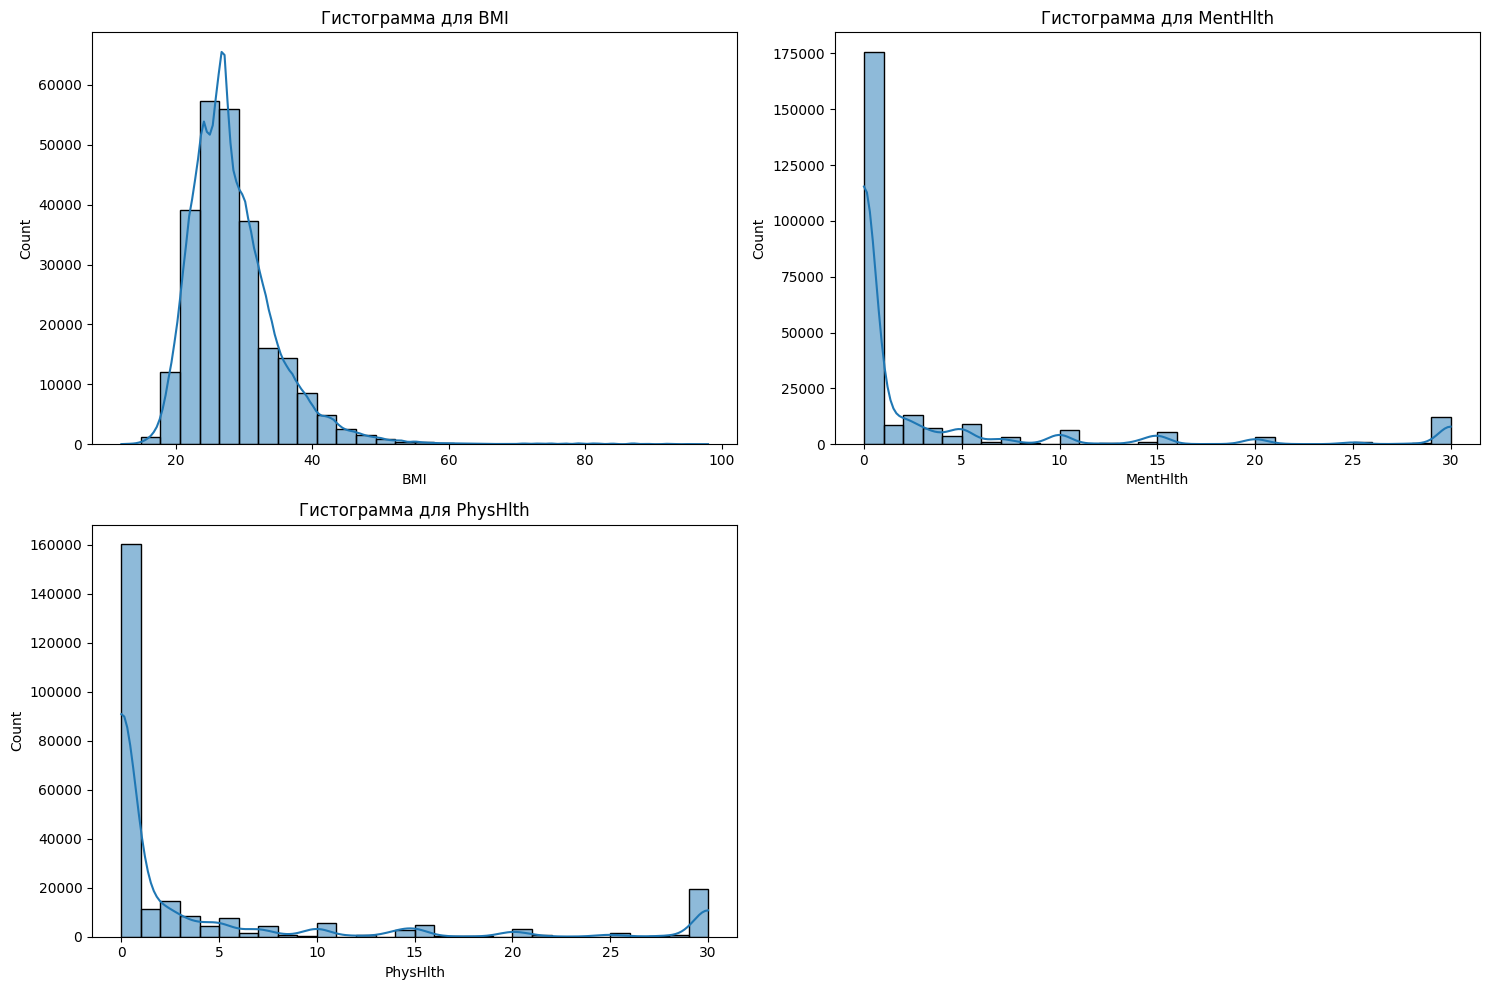

Время построения гистограмм: 5.2382 секунд


In [27]:
# Гистограммы для числовых признаков
start_time = time.time()  # Начало замера времени
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Гистограмма для {feature}")
plt.tight_layout()
plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения гистограмм: {end_time - start_time:.4f} секунд")

- Распределение BMI имеет модулярный характер с пиком в районе значения ~25–30. Это указывает на то, что большинство пациентов имеют нормальный вес.
- Распределение MentHlth имеет резкий пик в нулевой точке, что указывает на то, что большинство пациентов не испытывают проблем с ментальным здоровьем.
- Аналогично MentHlth, распределение PhysHlth также имеет резкий пик в нулевой точке, указывая на то, что большинство пациентов не имеют серьезных физических проблем.

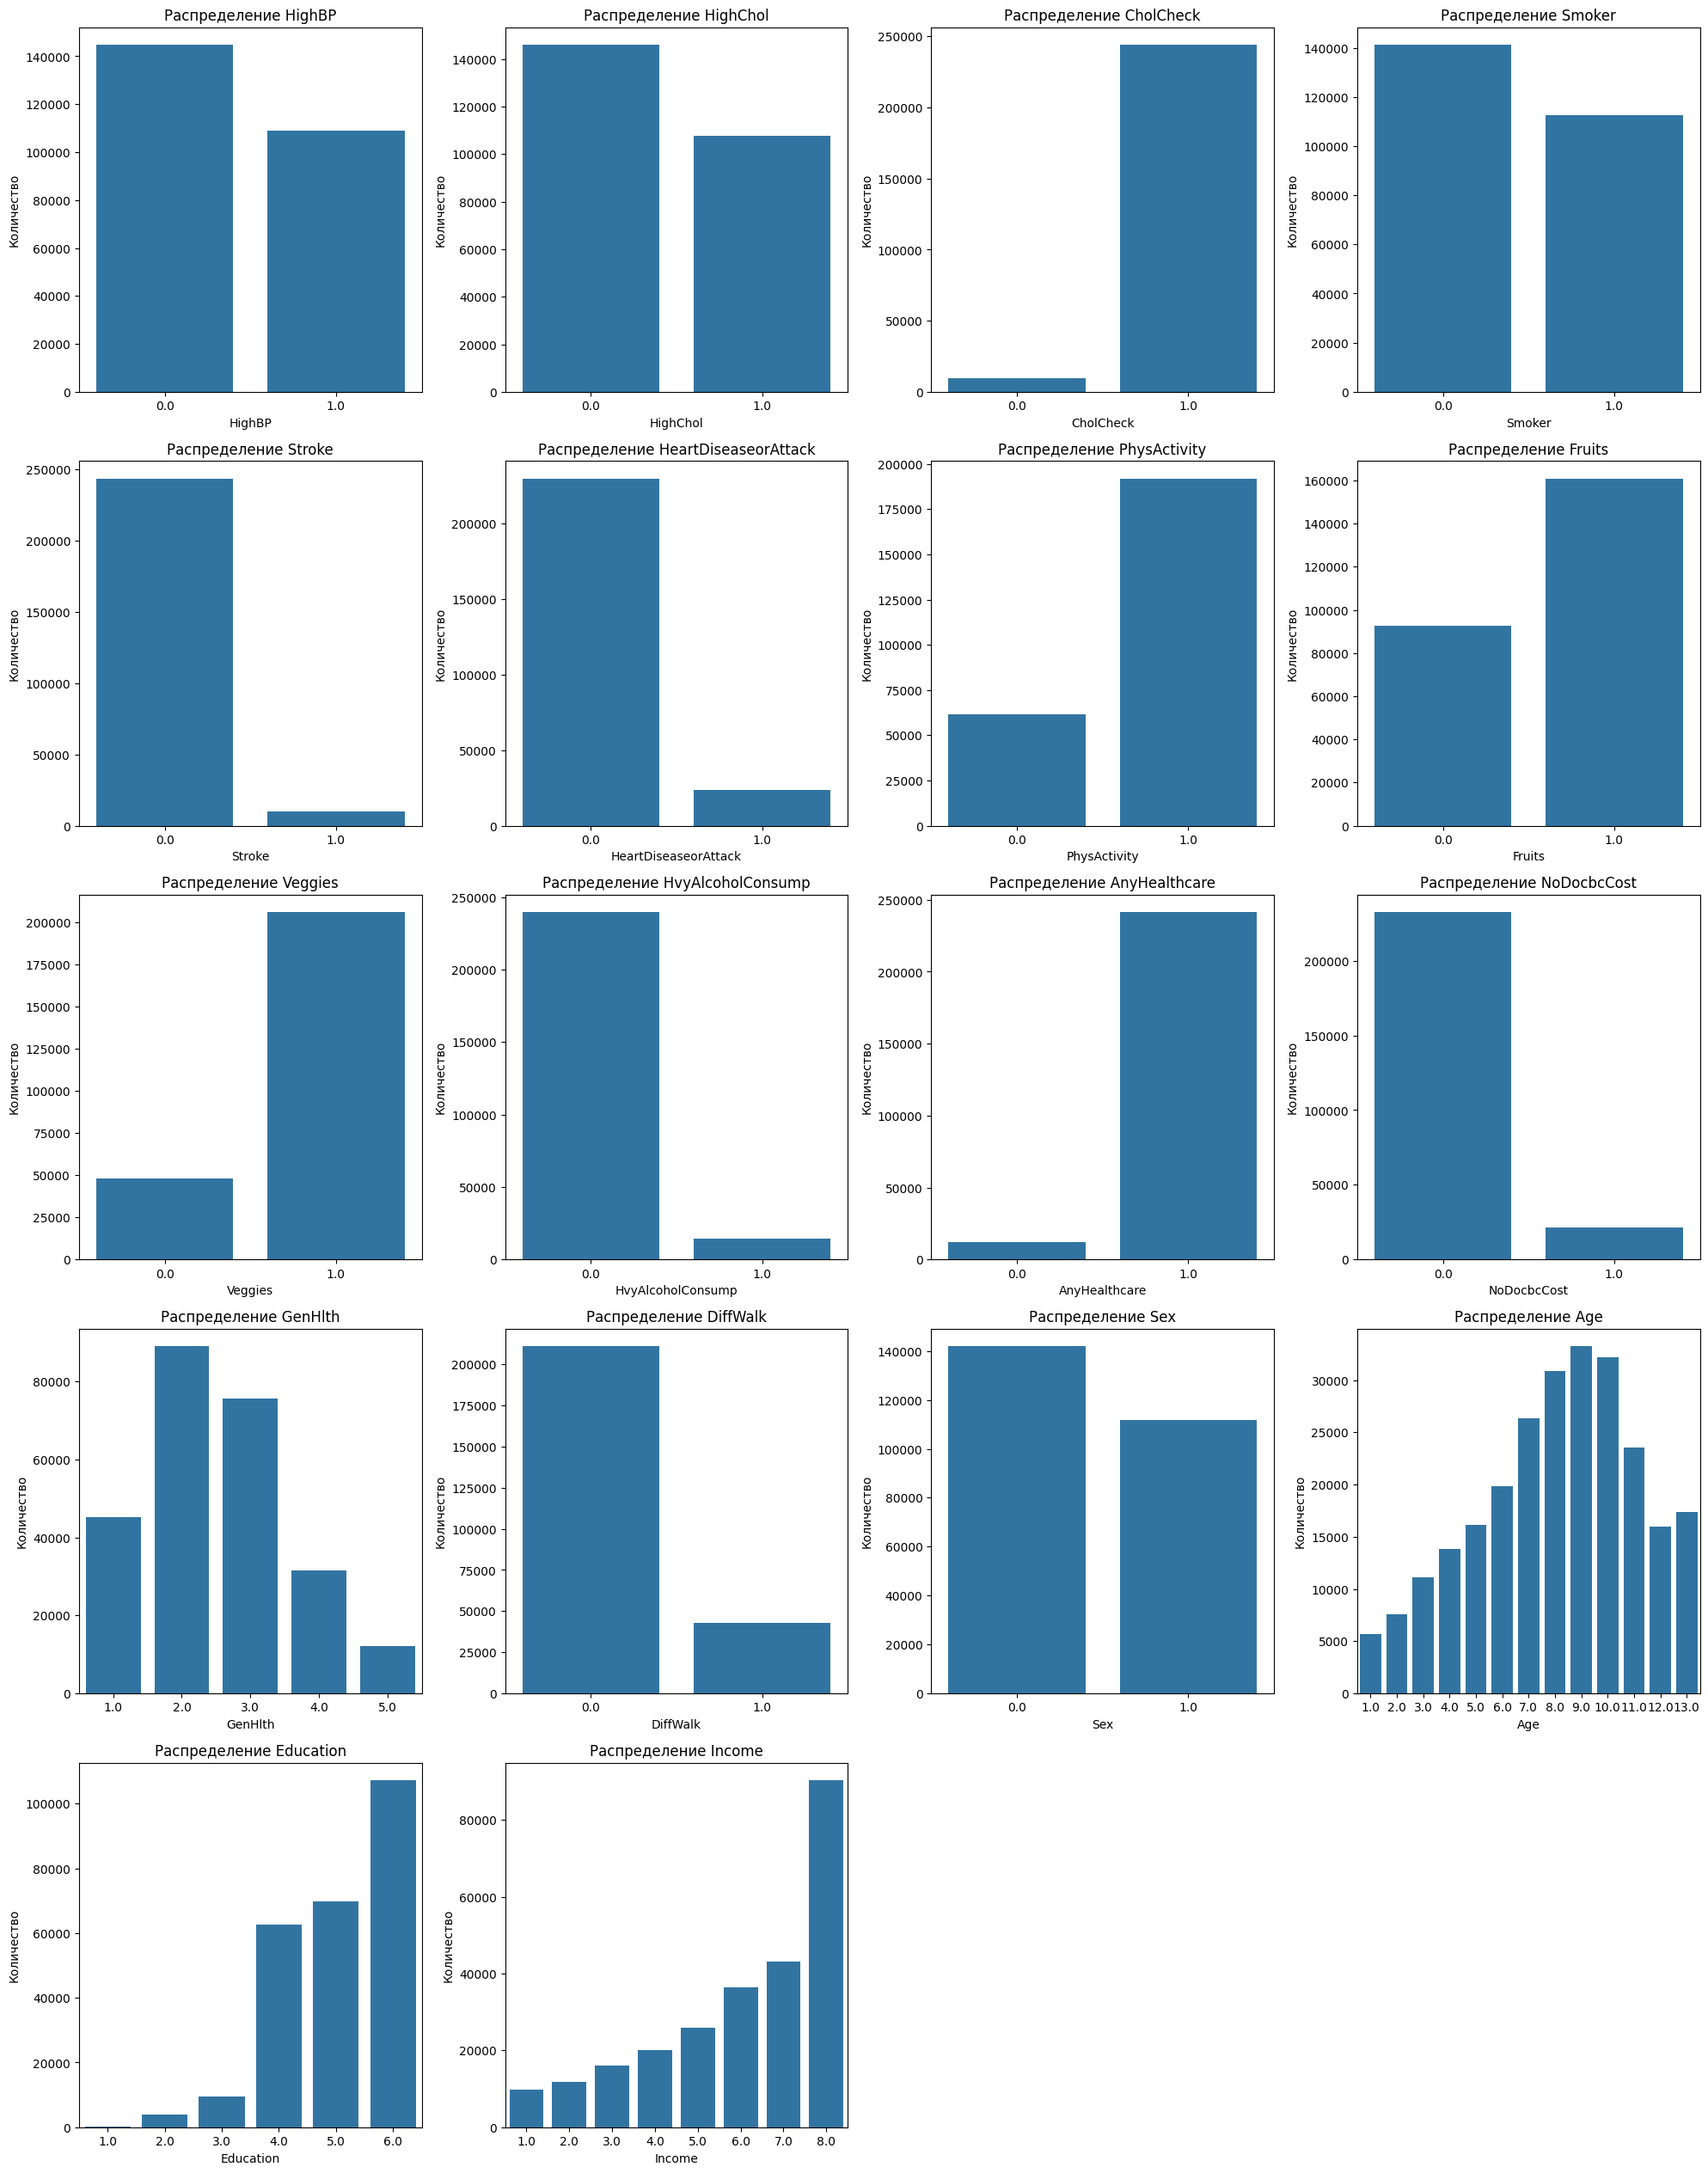

Время построения countplots: 6.0225 секунд


In [28]:
# Countplot для категориальных признаков
start_time = time.time()  # Начало замера времени
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=df, x=feature)
    plt.title(f"Распределение {feature}")
    plt.xlabel(feature)
    plt.ylabel("Количество")
plt.tight_layout()
plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения countplots: {end_time - start_time:.4f} секунд")

6. Корреляции и корреллограмма

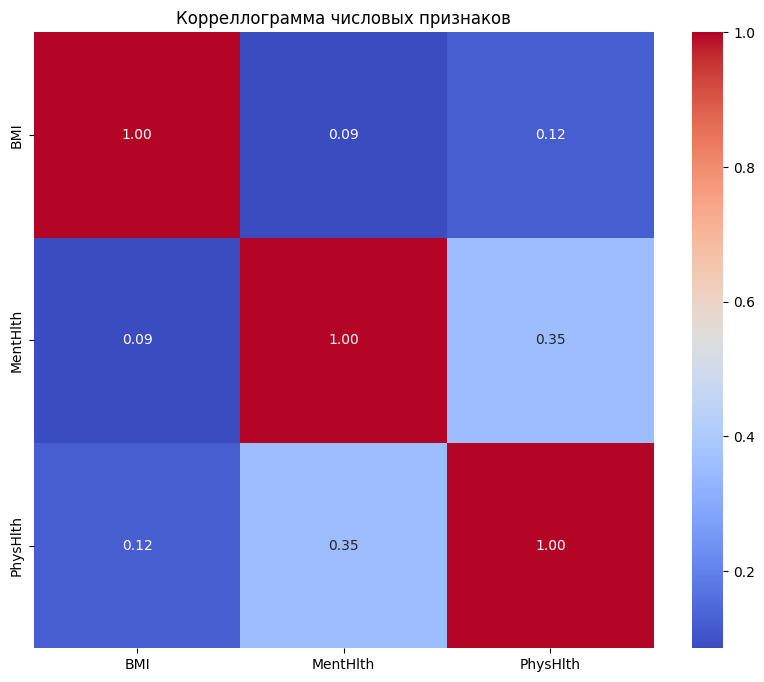

Время построения корреляционной матрицы: 0.0831 секунд


In [29]:
# Корреляционная матрица
start_time = time.time()  # Начало замера времени
correlation_matrix = df[numerical_features].corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреллограмма числовых признаков")
plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения корреляционной матрицы: {end_time - start_time:.4f} секунд")


- BMI имеет небольшую корреляцию с другими признаками, что может указывать на его уникальность в анализе.
- MentHlth и PhysHlth демонстрируют умеренную положительную корреляцию друг с другом, что логично, так как психическое и физическое здоровье часто связаны.

 7. Корреляции с целевой переменной

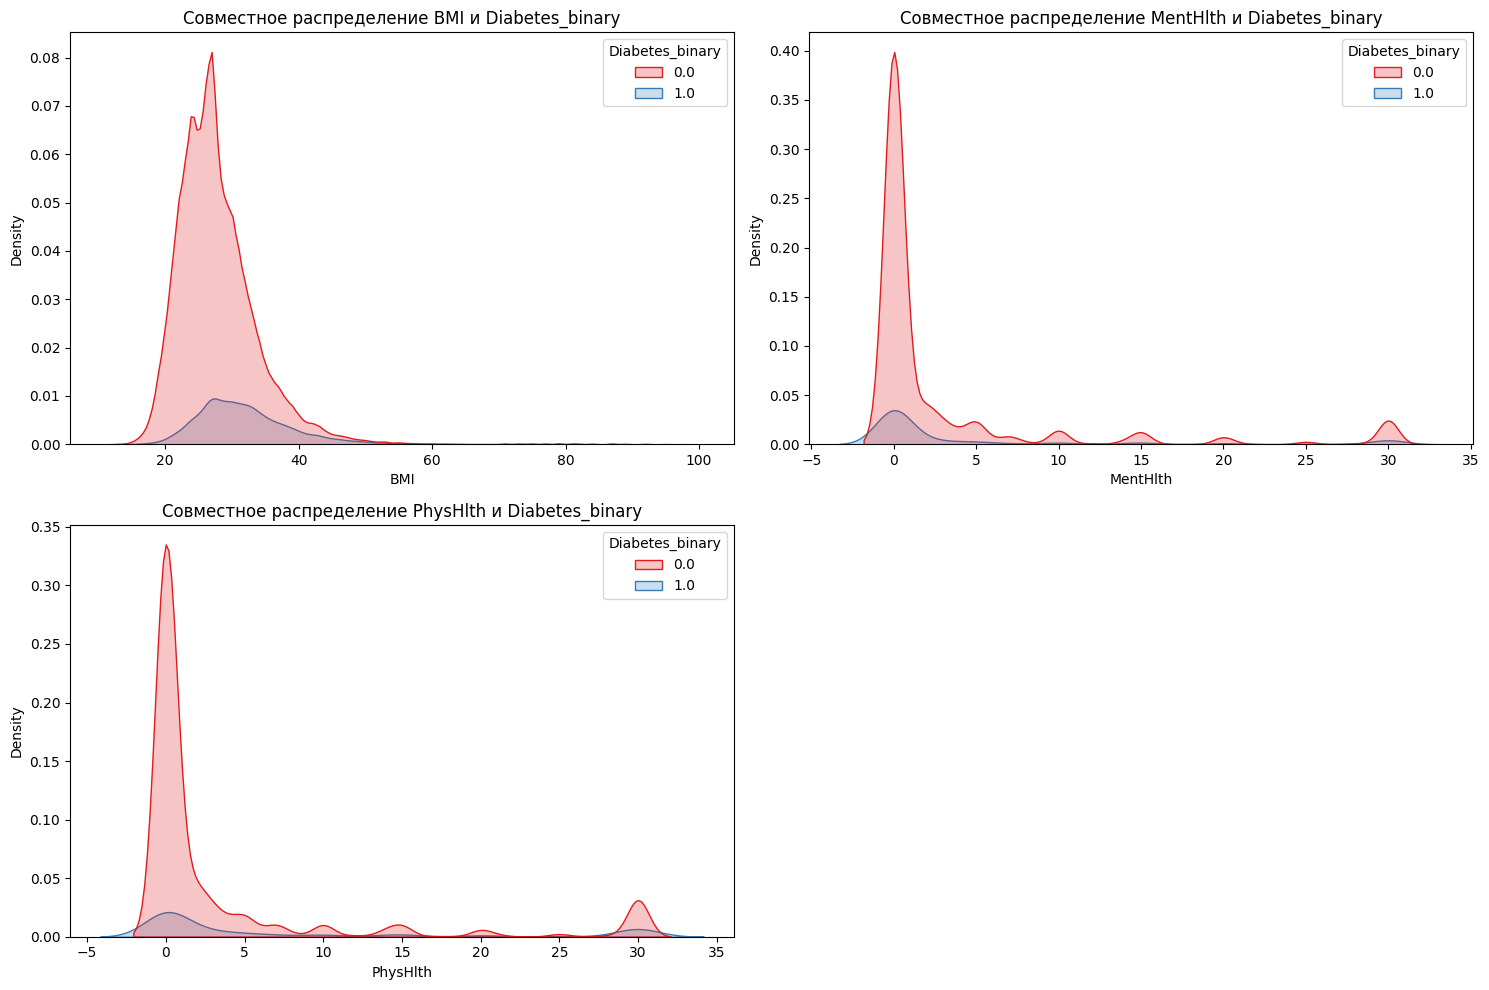

Время построения совместных распределений: 5.3088 секунд


In [30]:
# Совместное распределение числовых признаков с целевой переменной
start_time = time.time()  # Начало замера времени
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=feature, hue='Diabetes_binary', fill=True, palette="Set1")
    plt.title(f"Совместное распределение {feature} и Diabetes_binary")
plt.tight_layout()
plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения совместных распределений: {end_time - start_time:.4f} секунд")

- BMI является важным фактором риска диабета, так как пациенты с диабетом чаще имеют более высокие значения BMI.
- MentHlth и PhysHlth также имеют некоторое значение, но их влияние менее очевидно, чем у BMI.

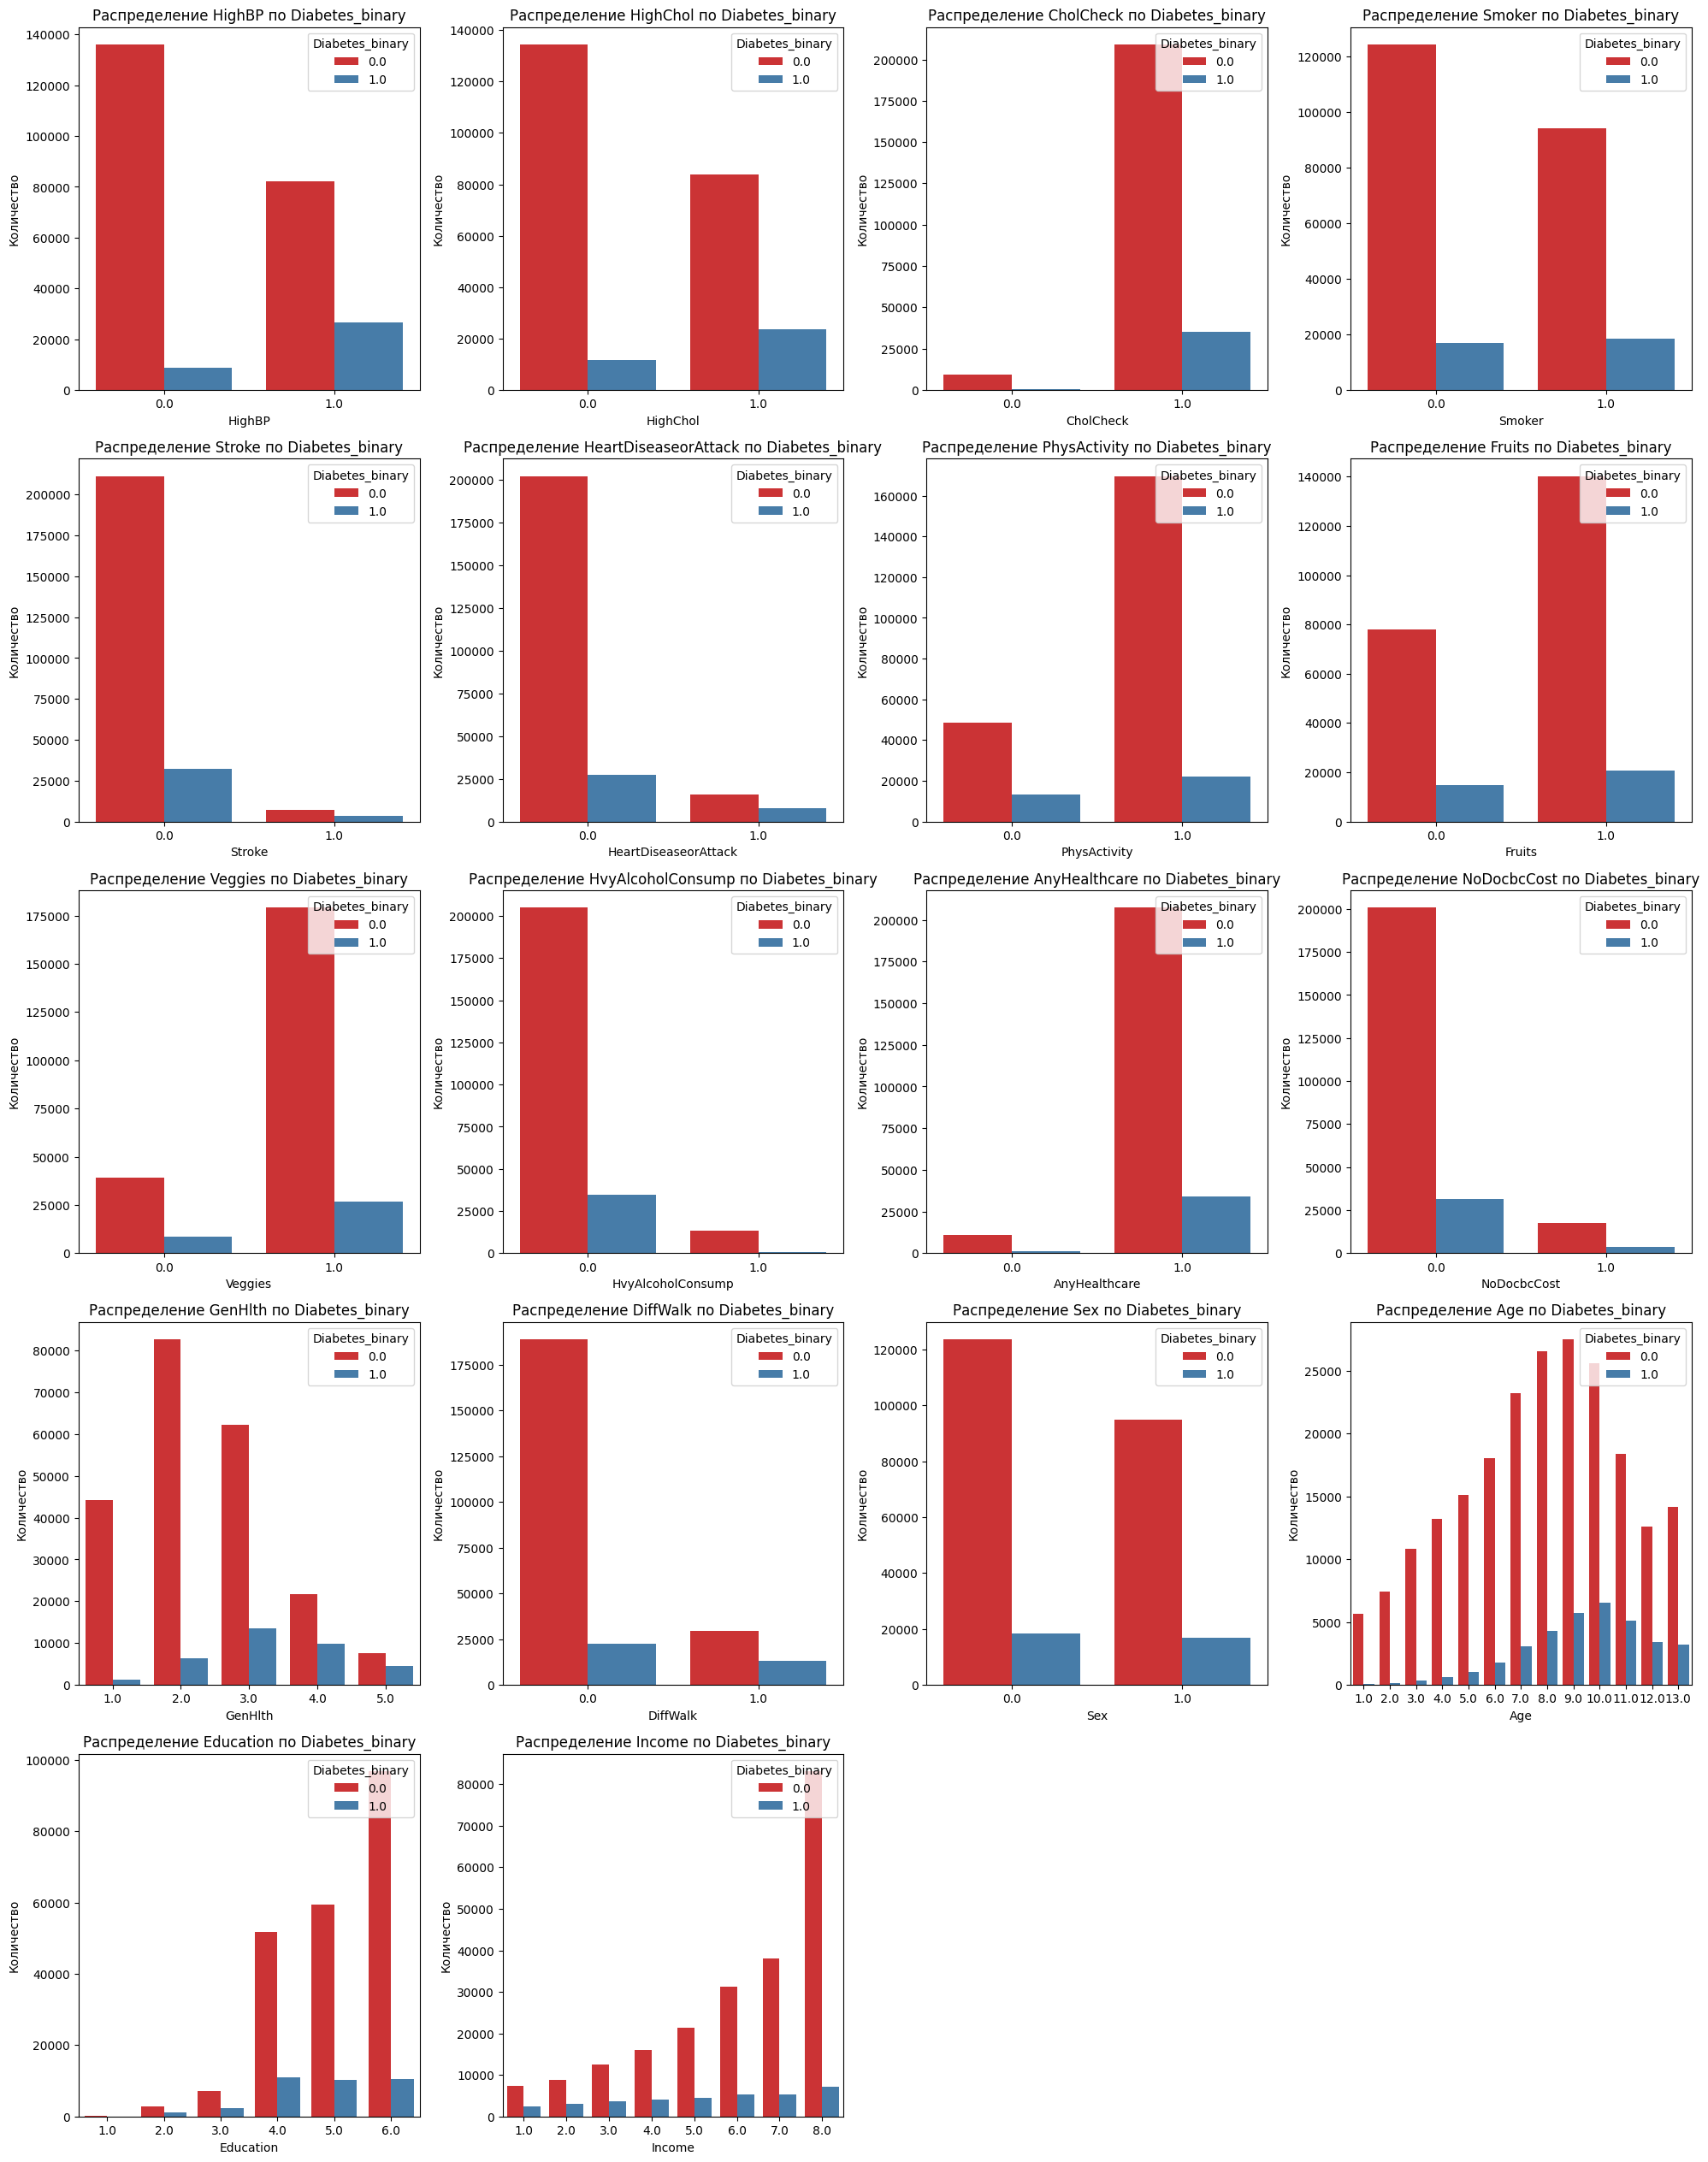

Время построения распределений категориальных признаков: 7.2768 секунд


In [31]:
# Распределение категориальных признаков с целевой переменной
start_time = time.time()  # Начало замера времени
plt.figure(figsize=(20, 30))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=df, x=feature, hue='Diabetes_binary', palette="Set1")
    plt.title(f"Распределение {feature} по Diabetes_binary")
    plt.xlabel(feature)
    plt.ylabel("Количество")
    plt.legend(title="Diabetes_binary", loc="upper right")
plt.tight_layout()
plt.show()
end_time = time.time()  # Конец замера времени
print(f"Время построения распределений категориальных признаков: {end_time - start_time:.4f} секунд")

- HighBP : Большинство пациентов с диабетом (Diabetes_binary = 1) имеют высокое артериальное давление (HighBP = 1), что указывает на связь между гипертонией и диабетом.
- Smoker : Количество курящих пациентов (Smoker = 1) выше среди тех, кто не имеет диабета (Diabetes_binary = 0), хотя разница не очень велика.
- Age : Пациенты старше 40–60 лет чаще имеют диабет (Diabetes_binary = 1), что соответствует известным медицинским фактам.
- Education : Уровень образования (Education) имеет слабую связь с диабетом, так как распределение почти одинаковое для обоих классов.
- Income : Пациенты с более низким доходом (Income) чаще имеют диабет (Diabetes_binary = 1), что может быть связано с доступностью здорового питания и образа жизни.

Выводы:
- HighBP , Age и Income являются важными факторами риска диабета.
- Smoker , Education и другие признаки имеют меньшее влияние, но все же могут быть полезны для модели.

In [32]:
# Подсчет уникальных значений для каждого признака
unique_values = df.nunique()
print("\nКоличество уникальных значений для каждого признака:")
print(unique_values)


Количество уникальных значений для каждого признака:
Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


### Разделение набора данных на обучающую и тестовую выборки 

В процессе разработки модели машинного обучения данные были разделены на обучающую и тестовую выборки в соотношении 80/20 . Это стандартный подход, который позволяет использовать большую часть данных для обучения модели (80%) и оставить меньшую часть (20%) для тестирования её производительности.

Для датасета (diabetes_binary_health_indicators_BRFSS2015.csv) наиболее подходящим методом является случайное разделение , так как:

Данные не имеют временной или последовательной структуры (например, временные метки или порядок событий).
Цель задачи — обучить модель для классификации диабета на основе признаков пациента, что не требует учета временного контекста.
Данные представляют собой независимые наблюдения (каждая строка соответствует отдельному пациенту).

Обоснование выбора случайного разделения:
Случайное разделение гарантирует, что обучающая и тестовая выборки будут репрезентативными по отношению к исходному датасету.
Это стандартный подход для задач классификации, таких как ваша.

Используем функцию train_test_split из библиотеки sklearn.model_selection для случайного разделения данных.

In [33]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Diabetes_binary'])  # Все признаки, кроме целевой переменной
y = df['Diabetes_binary']                # Целевая переменная

# Разделение на обучающую и тестовую выборки (80/20)
start_time = time.time()  # Начало замера времени
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
end_time = time.time()  # Конец замера времени

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")
print(f"Время разделения данных: {end_time - start_time:.4f} секунд")

Размер обучающей выборки: 202944 строк
Размер тестовой выборки: 50736 строк
Время разделения данных: 0.1068 секунд


In [34]:
# Проверка распределения классов
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение классов в обучающей выборке:
Diabetes_binary
0.0    0.860666
1.0    0.139334
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Diabetes_binary
0.0    0.860671
1.0    0.139329
Name: proportion, dtype: float64


Результаты показывают, что распределение классов в обучающей и тестовой выборках практически одинаково. Это подтверждает корректность использования параметра stratify=y при разделении данных. 

In [35]:
print(X_train.dtypes)

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


### Обучение

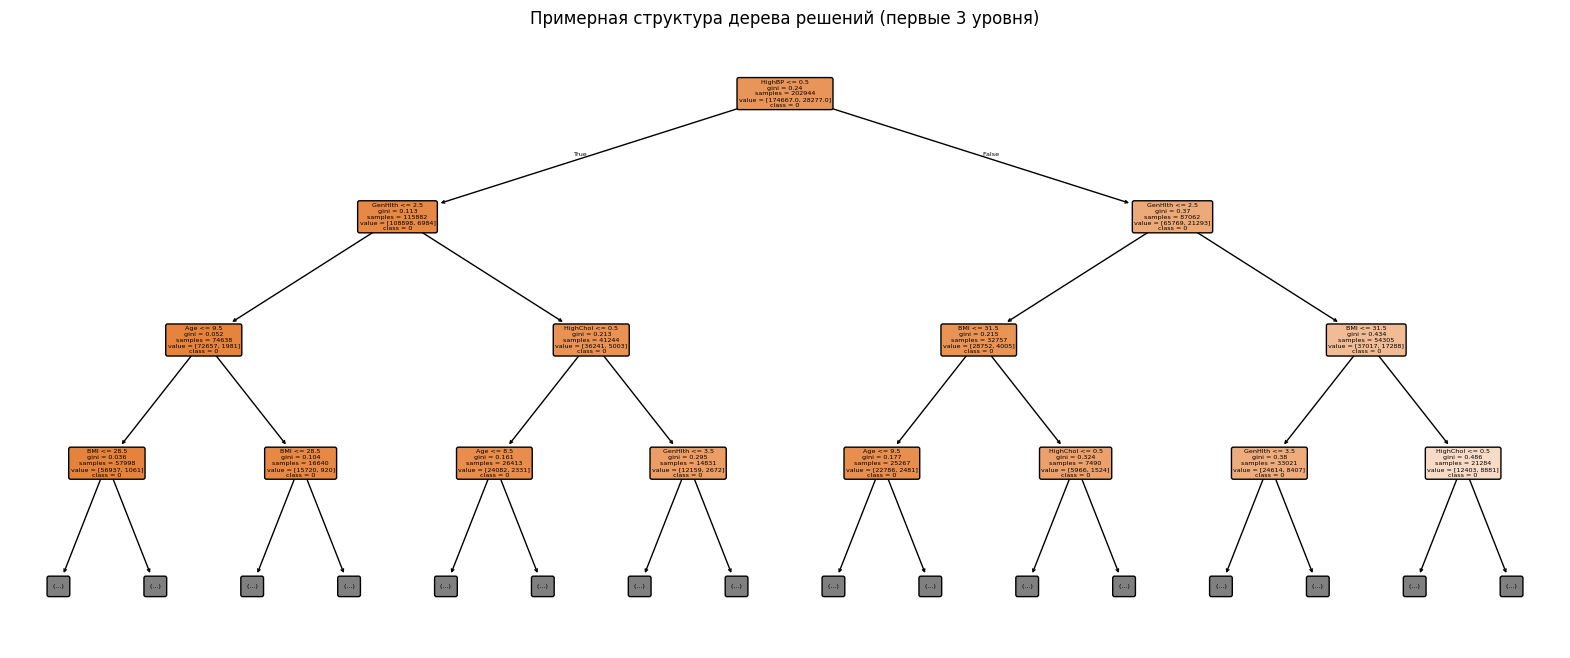

In [81]:
# пример дерева решений
# Обучаем дерево
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(
    dt_model,
    feature_names=X_train.columns,  # если X_train — DataFrame
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    max_depth=3  # Ограничим глубину для наглядности
)
plt.title("Примерная структура дерева решений (первые 3 уровня)")
plt.show()

In [36]:
# Список моделей, связанных с деревьями решений
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Оценка моделей с помощью k-fold cross-validation
results_cv = {}
print("\n=== Оценка моделей с помощью k-fold cross-validation ===")
for model_name, model in models.items():
    print(f"\nОценка модели: {model_name}")
    start_time = time.time()  # Начало замера времени
    
    # k-fold cross-validation с 5 фолдами
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    mean_score = scores.mean()
    std_score = scores.std()
    
    results_cv[model_name] = {
        "Mean ROC-AUC": mean_score,
        "Std ROC-AUC": std_score
    }
    
    end_time = time.time()  # Конец замера времени
    print(f"ROC-AUC (mean ± std): {mean_score:.4f} ± {std_score:.4f}")
    print(f"Время выполнения: {end_time - start_time:.4f} секунд")

# Вывод результатов cross-validation
results_cv_df = pd.DataFrame(results_cv).T
print("\nИтоговые результаты k-fold cross-validation:")
print(results_cv_df)

# Выбор лучшей модели по средней метрике ROC-AUC
best_model_cv = results_cv_df['Mean ROC-AUC'].idxmax()
print(f"\nЛучшая модель по k-fold cross-validation: {best_model_cv}")

# Обучение лучшей модели на всей обучающей выборке
best_model_instance = models[best_model_cv]
start_time = time.time()
best_model_instance.fit(X_train, y_train)
end_time = time.time()
print(f"Модель {best_model_cv} обучена за {end_time - start_time:.4f} секунд.")

# Оценка лучшей модели на тестовой выборке
y_pred = best_model_instance.predict(X_test)
y_proba = best_model_instance.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
f1 = report['1.0']['f1-score']
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\n=== Итоговые метрики лучшей модели ({best_model_cv}) на тестовой выборке ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (class 1): {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


=== Оценка моделей с помощью k-fold cross-validation ===

Оценка модели: Decision Tree
ROC-AUC (mean ± std): 0.5998 ± 0.0024
Время выполнения: 2.9013 секунд

Оценка модели: Random Forest
ROC-AUC (mean ± std): 0.7990 ± 0.0017
Время выполнения: 64.3724 секунд

Оценка модели: Gradient Boosting
ROC-AUC (mean ± std): 0.8305 ± 0.0017
Время выполнения: 66.5750 секунд

Оценка модели: XGBoost
ROC-AUC (mean ± std): 0.8258 ± 0.0012
Время выполнения: 1.9088 секунд

Итоговые результаты k-fold cross-validation:
                   Mean ROC-AUC  Std ROC-AUC
Decision Tree          0.599787     0.002442
Random Forest          0.798956     0.001674
Gradient Boosting      0.830550     0.001712
XGBoost                0.825835     0.001161

Лучшая модель по k-fold cross-validation: Gradient Boosting
Модель Gradient Boosting обучена за 18.5484 секунд.

=== Итоговые метрики лучшей модели (Gradient Boosting) на тестовой выборке ===
Accuracy: 0.8647
F1-score (class 1): 0.2595
ROC-AUC: 0.8264


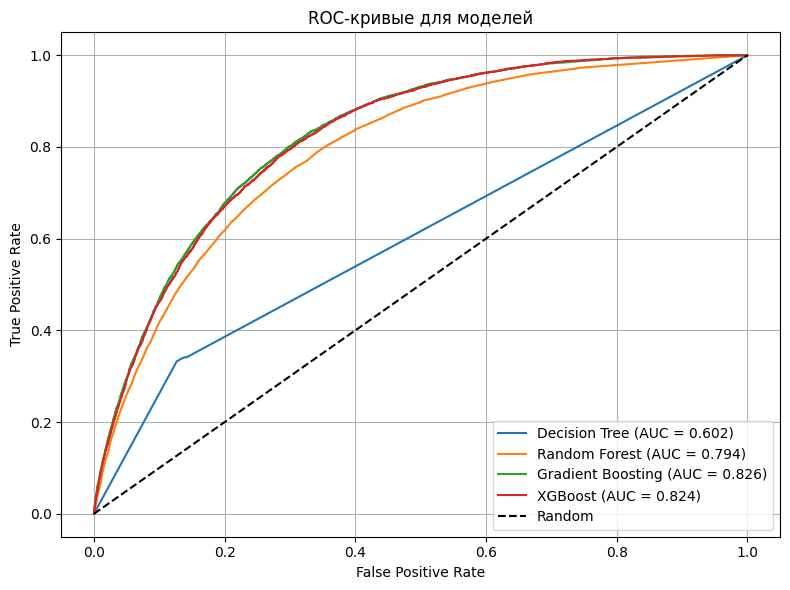

In [76]:
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Обучаем модель на всём train
    model.fit(X_train, y_train)
    # Предсказываем вероятности для теста
    y_proba = model.predict_proba(X_test)[:, 1]
    # Строим ROC-кривую
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Диагональ случайного классификатора
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Сохранение моделей

In [37]:
# Создание директории для сохранения моделей (если её нет)
os.makedirs("models", exist_ok=True)

print("\n Сохранение обученных моделей ")
for model_name, model in models.items():
    # Обучение модели на всей обучающей выборке
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Сохранение модели в файл
    model_path = f"models/{model_name.replace(' ', '_')}.joblib"
    joblib.dump(model, model_path)
    print(f"Модель {model_name} сохранена в файл: {model_path}")
    print(f"Время обучения и сохранения: {end_time - start_time:.4f} секунд\n")


 Сохранение обученных моделей 
Модель Decision Tree сохранена в файл: models/Decision_Tree.joblib
Время обучения и сохранения: 0.8381 секунд

Модель Random Forest сохранена в файл: models/Random_Forest.joblib
Время обучения и сохранения: 17.7809 секунд

Модель Gradient Boosting сохранена в файл: models/Gradient_Boosting.joblib
Время обучения и сохранения: 18.1137 секунд

Модель XGBoost сохранена в файл: models/XGBoost.joblib
Время обучения и сохранения: 0.4174 секунд



### Выбор наиболее перспективной модели

In [38]:
# Обучение лучшей модели (Gradient Boosting) на всей обучающей выборке
print("\n Обучение лучшей модели на всей обучающей выборке")
best_model_name = "Gradient Boosting"
best_model_instance = models[best_model_name]

start_time = time.time()
best_model_instance.fit(X_train, y_train)
end_time = time.time()

print(f"Модель {best_model_name} обучена за {end_time - start_time:.4f} секунд.")


 Обучение лучшей модели на всей обучающей выборке
Модель Gradient Boosting обучена за 14.6784 секунд.


In [39]:
# Оценка лучшей модели на тестовой выборке
print("\n Итоговые метрики лучшей модели на тестовой выборке ")

y_pred_best = best_model_instance.predict(X_test)
y_proba_best = best_model_instance.predict_proba(X_test)[:, 1]

report_best = classification_report(y_test, y_pred_best, output_dict=True)
accuracy_best = report_best['accuracy']
f1_best = report_best['1.0']['f1-score']
roc_auc_best = roc_auc_score(y_test, y_proba_best)

print(f"Accuracy: {accuracy_best:.4f}")
print(f"F1-score (class 1): {f1_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")


 Итоговые метрики лучшей модели на тестовой выборке 
Accuracy: 0.8647
F1-score (class 1): 0.2595
ROC-AUC: 0.8264


-  Модель правильно классифицирует 86.47% всех наблюдений.
- F1-score для класса 1 (люди с диабетом) довольно низкий.
- ROC-AUC = 0.8264, что показывает, насколько хорошо модель различает два класса.


In [40]:
# Сохранение лучшей модели в файл
print("\n Сохранение лучшей модели")
best_model_path = f"models/{best_model_name.replace(' ', '_')}_best.joblib"
joblib.dump(best_model_instance, best_model_path)
print(f"Лучшая модель сохранена в файл: {best_model_path}")


 Сохранение лучшей модели
Лучшая модель сохранена в файл: models/Gradient_Boosting_best.joblib


In [41]:
#Проверка баланса классов
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Распределение классов в обучающей выборке:
Diabetes_binary
0.0    0.860666
1.0    0.139334
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Diabetes_binary
0.0    0.860671
1.0    0.139329
Name: proportion, dtype: float64


класс 1 значительно меньше, это объясняет низкий F1-score.

Изначально классы в данных были сильно несбалансированы: около 86% без диабета и только 14% с диабетом. Это может привести к смещению модели в сторону большинства. SMOTE позволяет искусственно "синтезировать" новые примеры миноритарного класса, улучшая обучение модели.

In [42]:
# Применение SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Проверка распределения после SMOTE
print("\nРаспределение классов после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))


Распределение классов после SMOTE:
Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


После применения SMOTE классы сбалансированы поровну — по 50% для каждого класса, что обеспечит более честную и устойчивую модель.

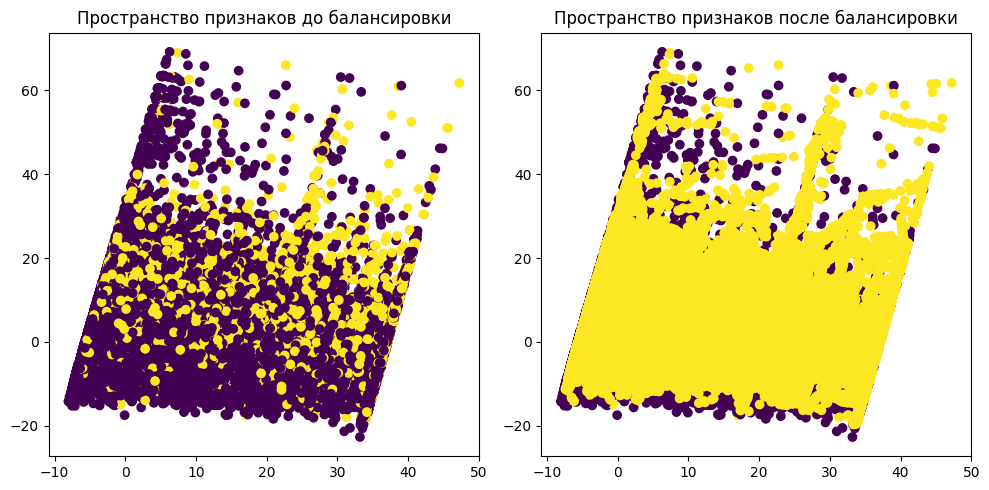

In [43]:
# Применение PCA для уменьшения размерности
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_train_resampled_pca = pca.transform(X_train_resampled)

# Визуализация до балансировки
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('Пространство признаков до балансировки')

# Визуализация после балансировки
plt.subplot(1, 2, 2)
plt.scatter(X_train_resampled_pca[:, 0], X_train_resampled_pca[:, 1], c=y_train_resampled, cmap='viridis')
plt.title('Пространство признаков после балансировки')
plt.tight_layout()
plt.show()

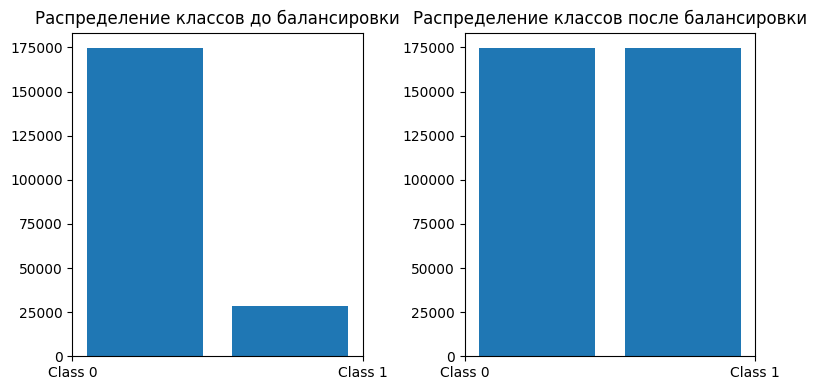

In [44]:
# Распределение классов до балансировки
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, rwidth=0.8)
plt.title('Распределение классов до балансировки')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

# Распределение классов после балансировки
plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=2, rwidth=0.8)
plt.title('Распределение классов после балансировки')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()

Подбор гиперпараметров с помощью GridSearchCV

Настройка параметров влияет на качество и скорость обучения модели. Гиперпараметры выбираются так, чтобы максимизировать ROC-AUC, метрику, хорошо подходящую для несбалансированных задач классификации.

In [45]:
start_time = time.time()

# Задание сетки параметров
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Поиск лучших параметров
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

# Вывод результатов
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# Лучшая модель
best_model_instance = grid_search.best_estimator_

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Лучший ROC-AUC на кросс-валидации: 0.9599
Время выполнения: 1789.40 секунд


In [50]:
start_time = time.time()

# Предсказания на тестовой выборке
y_pred_best = best_model_instance.predict(X_test)
y_proba_best = best_model_instance.predict_proba(X_test)[:, 1]

# Оценка метрик
report_best = classification_report(y_test, y_pred_best, output_dict=True)
accuracy_best = report_best['accuracy']
f1_best = report_best['1.0']['f1-score']
roc_auc_best = roc_auc_score(y_test, y_proba_best)

print("\nИтоговые метрики на тестовой выборке:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"F1-score (class 1): {f1_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


Итоговые метрики на тестовой выборке:
Accuracy: 0.8571
F1-score (class 1): 0.3530
ROC-AUC: 0.8202
Время выполнения: 0.24 секунд


Accuracy: 0.8571 — общее количество верно классифицированных примеров.

F1-score по классу 1 (диабет): 0.3530 — умеренное качество выявления больных диабетом (класс 1), при этом важно помнить о высокой изначальной дисбалансировке.

ROC-AUC: 0.8202 — модель уверенно различает больных и здоровых, даже несмотря на невысокий F1.

### Улучшение качества модели.

#### Применение комбинированной стратегии балансировки SMOTEENN

SMOTEENN - комбинированный метод, который сначала генерирует синтетические примеры (SMOTE), а затем удаляет шумные образцы (ENN). Этот метод часто дает лучшие результаты, чем просто SMOTE.

In [48]:
# Применение SMOTEENN для балансировки классов
print("\n Применение SMOTEENN для балансировки классов ")
start_time = time.time()

# Создание и применение SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

# Проверка нового распределения классов
print("\nРаспределение классов после SMOTEENN:")
print(y_train_smoteenn.value_counts(normalize=True))

# Обучение модели с лучшими параметрами на сбалансированных данных SMOTEENN
best_gb_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
gb_model_smoteenn = GradientBoostingClassifier(random_state=42, **best_gb_params)
gb_model_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

# Предсказания и оценка на тестовых данных
y_pred_smoteenn = gb_model_smoteenn.predict(X_test)
y_proba_smoteenn = gb_model_smoteenn.predict_proba(X_test)[:, 1]

# Расчет метрик
report_smoteenn = classification_report(y_test, y_pred_smoteenn, output_dict=True)
accuracy_smoteenn = report_smoteenn['accuracy']
f1_smoteenn = report_smoteenn['1.0']['f1-score']
roc_auc_smoteenn = roc_auc_score(y_test, y_proba_smoteenn)

print("\nМетрики на тестовой выборке после SMOTEENN:")
print(f"Accuracy: {accuracy_smoteenn:.4f}")
print(f"F1-score (class 1): {f1_smoteenn:.4f}")
print(f"ROC-AUC: {roc_auc_smoteenn:.4f}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


 Применение SMOTEENN для балансировки классов 

Распределение классов после SMOTEENN:
Diabetes_binary
1.0    0.612692
0.0    0.387308
Name: proportion, dtype: float64

Метрики на тестовой выборке после SMOTEENN:
Accuracy: 0.7698
F1-score (class 1): 0.4575
ROC-AUC: 0.8244
Время выполнения: 146.20 секунд


метод не только добавляет синтетические примеры меньшинственного класса, но и удаляет шумные примеры большинственного класса.

In [49]:
# Сравнение с предыдущими результатами
print("Сравнение с предыдущими результатами")
print("| Метод          | Accuracy | F1-score (class 1)| ROC-AUC |")
print("|----------------|----------|-------------------|---------|")
print(f"| Базовая модель | {accuracy_best:.4f}   | {f1_best:.4f}            | {roc_auc_best:.4f}  |")
print(f"| SMOTEENN       | {accuracy_smoteenn:.4f}   | {f1_smoteenn:.4f}            | {roc_auc_smoteenn:.4f}  |")


Сравнение с предыдущими результатами
| Метод          | Accuracy | F1-score (class 1)| ROC-AUC |
|----------------|----------|-------------------|---------|
| Базовая модель | 0.8571   | 0.3530            | 0.8202  |
| SMOTEENN       | 0.7698   | 0.4575            | 0.8244  |


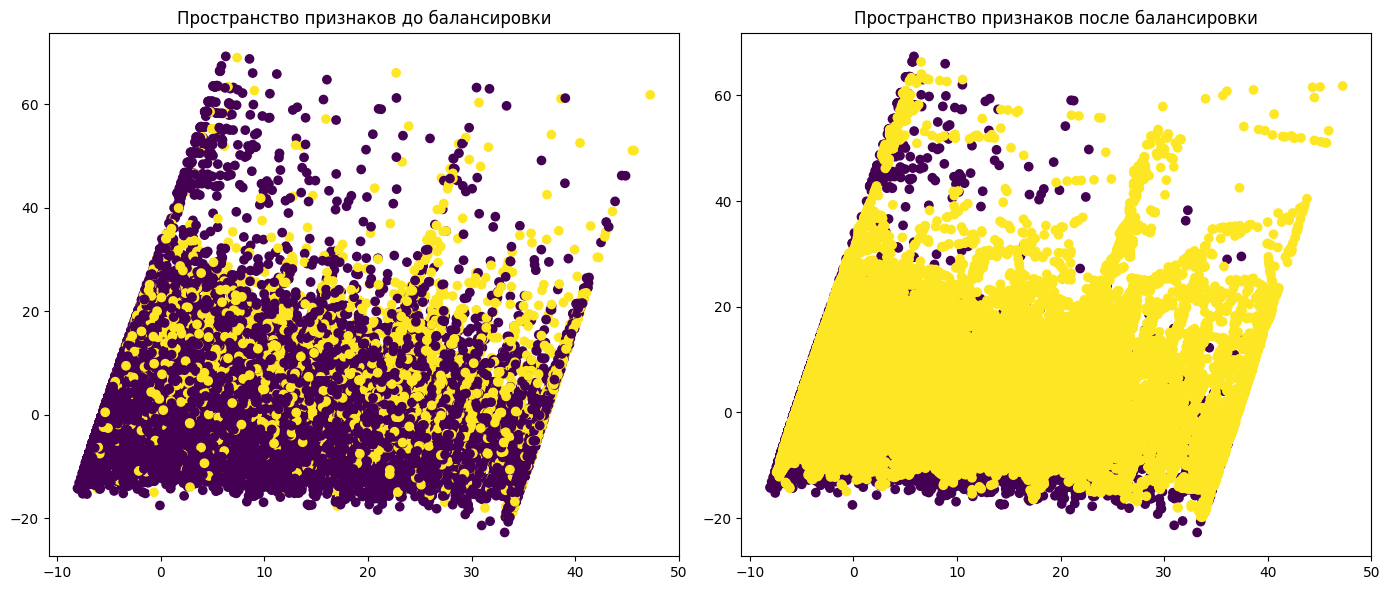

In [51]:
# Применение PCA для уменьшения размерности
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_train_smoteenn_pca = pca.transform(X_train_smoteenn)

# Визуализация до балансировки
plt.figure(figsize=(14, 6))

# До балансировки
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('Пространство признаков до балансировки')

# После балансировки
plt.subplot(1, 2, 2)
plt.scatter(X_train_smoteenn_pca[:, 0], X_train_smoteenn_pca[:, 1], c=y_train_smoteenn, cmap='viridis')
plt.title('Пространство признаков после балансировки')

plt.tight_layout()
plt.show()

C:\Users\marrr\AppData\Local\Temp\ipykernel_38044\253582207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Blues')  # Указываем x вместо y_train напрямую
C:\Users\marrr\AppData\Local\Temp\ipykernel_38044\253582207.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smoteenn, palette='Blues')  # Аналогично для сбалансированных данных


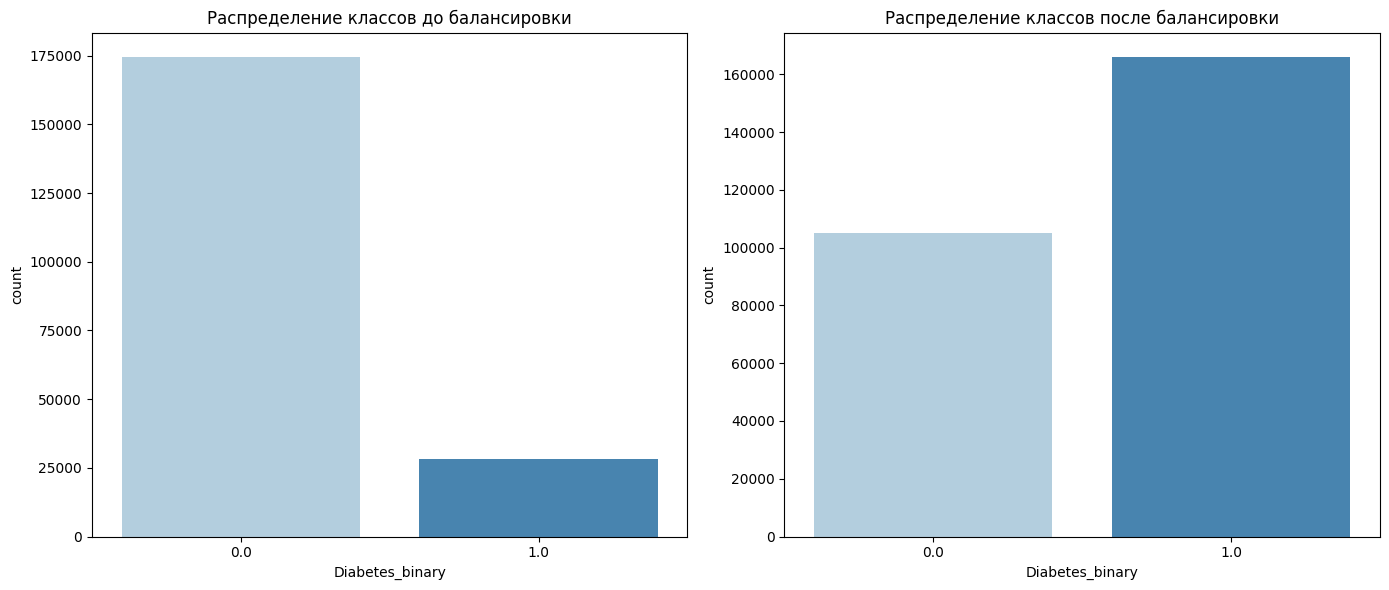

In [54]:
# Распределение классов до балансировки
plt.figure(figsize=(14, 6))

# До балансировки
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Blues')  # Указываем x вместо y_train напрямую
plt.title('Распределение классов до балансировки')

# После балансировки
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smoteenn, palette='Blues')  # Аналогично для сбалансированных данных
plt.title('Распределение классов после балансировки')

plt.tight_layout()
plt.show()

Мы получили улучшение в F1-score для класса с диабетом при использовании SMOTEENN, хотя общая точность (Accuracy) немного снизилась. Это нормальное явление для несбалансированных данных — мы жертвуем точностью на доминирующем классе для лучшего выявления редкого класса.

#### Оптимизации порога классификации

In [70]:
# Оптимизация порога классификации
start_time = time.time()

# Используем модель с SMOTEENN, поскольку она показала лучший F1-score
best_current_model = gb_model_smoteenn
X_train_best = X_train_smoteenn
y_train_best = y_train_smoteenn
print("Используем модель с балансировкой SMOTEENN для оптимизации порога")

# Получаем предсказанные вероятности для обучающей выборки
y_train_proba = best_current_model.predict_proba(X_train_best)[:, 1]

# Определяем функцию для поиска оптимального порога
def find_optimal_threshold(y_true, y_proba):
    """Находит оптимальный порог для максимизации F1-score"""
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_f1 = 0
    best_threshold = 0.5  # стандартный порог
    
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold, best_f1

# Поиск оптимального порога на обучающей выборке
optimal_threshold, train_f1 = find_optimal_threshold(y_train_best, y_train_proba)
print(f"\nОптимальный порог: {optimal_threshold:.2f}, F1-score на обучающей выборке: {train_f1:.4f}")

# Применение оптимального порога на тестовых данных
y_test_proba = best_current_model.predict_proba(X_test)[:, 1]
y_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

# Расчет метрик с оптимальным порогом
report_optimal = classification_report(y_test, y_pred_optimal, output_dict=True)
accuracy_optimal = report_optimal['accuracy']
f1_optimal = report_optimal['1.0']['f1-score']
roc_auc_optimal = roc_auc_score(y_test, y_test_proba)

print("\nМетрики на тестовой выборке с оптимальным порогом:")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"F1-score (class 1): {f1_optimal:.4f}")
print(f"ROC-AUC: {roc_auc_optimal:.4f}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


Используем модель с балансировкой SMOTEENN для оптимизации порога

Оптимальный порог: 0.50, F1-score на обучающей выборке: 0.9554

Метрики на тестовой выборке с оптимальным порогом:
Accuracy: 0.7698
F1-score (class 1): 0.4575
ROC-AUC: 0.8244
Время выполнения: 4.84 секунд


In [71]:
# Сравнение с предыдущими результатами
print("Сравнение с предыдущими результатами")
print("| Метод                     | Accuracy| F1-score (class 1)| ROC-AUC |")
print("|---------------------------|---------|-------------------|---------|")
print(f"| Базовая модель            | {accuracy_best:.4f}  | {f1_best:.4f}            | {roc_auc_best:.4f}  |")
print(f"| SMOTEENN                  | {accuracy_smoteenn:.4f}  | {f1_smoteenn:.4f}            | {roc_auc_smoteenn:.4f}  |")
print(f"| Оптимизация порога ({optimal_threshold:.2f}) | {accuracy_optimal:.4f}  | {f1_optimal:.4f}            | {roc_auc_optimal:.4f}  |")


Сравнение с предыдущими результатами
| Метод                     | Accuracy| F1-score (class 1)| ROC-AUC |
|---------------------------|---------|-------------------|---------|
| Базовая модель            | 0.8571  | 0.3530            | 0.8202  |
| SMOTEENN                  | 0.7698  | 0.4575            | 0.8244  |
| Оптимизация порога (0.50) | 0.7698  | 0.4575            | 0.8244  |


Оптимизация порога не дала дополнительного улучшения, так как оптимальный порог совпал со стандартным

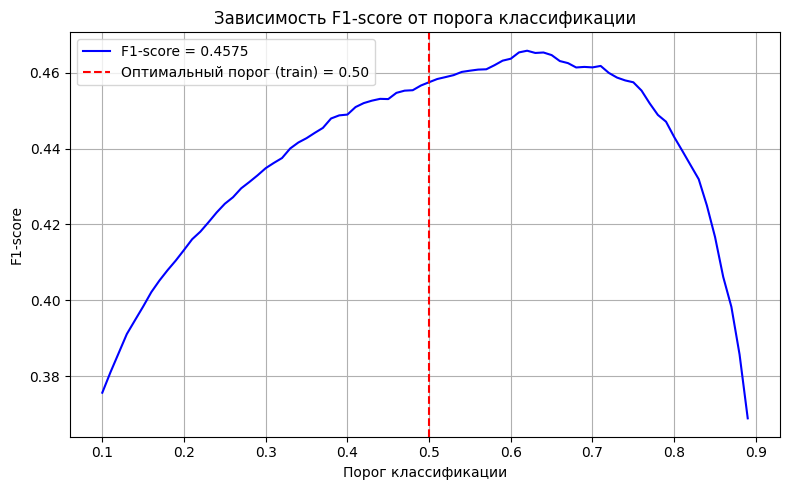

In [74]:
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
for threshold in thresholds:
    y_pred = (y_test_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, label='F1-score = 0.4575', color='blue')
plt.axvline(optimal_threshold, color='red', linestyle='--', 
            label=f'Оптимальный порог (train) = {optimal_threshold:.2f}')
plt.title('Зависимость F1-score от порога классификации')
plt.xlabel('Порог классификации')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Наивысшая точка синей линии — это максимальный F1-score, который можно получить на тестовой выборке, если подобрать порог "задним числом", зная ответы на тесте. (но он не используется для честной оценки).
- Красная линия — это тот порог, который реально используется для предсказаний на тесте, потому что он был найден на train.

Высота синей линии в точке пересечения с красной — это реальный F1-score, который был получен на тесте при выбранном пороге.



#### Отбор признаков

In [86]:
# Отбор информативных признаков
start_time = time.time()

# Будем использовать базовую модель для отбора признаков
# Создадим простую модель для RFE
base_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Начнем с попытки выбрать половину признаков
n_features_to_select = X_train.shape[1] // 2
print(f"Исходное количество признаков: {X_train.shape[1]}")
print(f"Количество признаков для отбора: {n_features_to_select}")

# Создаем RFE
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select, step=1)

# Применяем RFE к исходным данным
rfe.fit(X_train, y_train)

# Получаем маску отобранных признаков
selected_features_mask = rfe.support_
selected_features_indices = np.where(selected_features_mask)[0]
feature_names = X_train.columns

# Выводим отобранные признаки
print("\nОтобранные признаки:")
selected_feature_names = feature_names[selected_features_mask]
for i, feature in enumerate(selected_feature_names):
    print(f"{i+1}. {feature}")

# Создаем новые наборы данных только с отобранными признаками
X_train_selected = X_train.iloc[:, selected_features_mask]
X_test_selected = X_test.iloc[:, selected_features_mask]

# Обрабатываем новые данные с помощью SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_selected_resampled, y_train_selected_resampled = smote_enn.fit_resample(X_train_selected, y_train)

# Обучаем модель с лучшими параметрами на отобранных признаках
best_gb_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
gb_model_selected = GradientBoostingClassifier(random_state=42, **best_gb_params)
gb_model_selected.fit(X_train_selected_resampled, y_train_selected_resampled)

# Предсказания и оценка на тестовых данных
y_pred_selected = gb_model_selected.predict(X_test_selected)
y_proba_selected = gb_model_selected.predict_proba(X_test_selected)[:, 1]

# Расчет метрик
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
accuracy_selected = report_selected['accuracy']
f1_selected = report_selected['1.0']['f1-score']
roc_auc_selected = roc_auc_score(y_test, y_proba_selected)

print("\nМетрики на тестовой выборке после отбора признаков и SMOTEENN:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1-score (class 1): {f1_selected:.4f}")
print(f"ROC-AUC: {roc_auc_selected:.4f}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


Исходное количество признаков: 21
Количество признаков для отбора: 10

Отобранные признаки:
1. HighBP
2. HighChol
3. BMI
4. HeartDiseaseorAttack
5. HvyAlcoholConsump
6. GenHlth
7. DiffWalk
8. Sex
9. Age
10. Income

Метрики на тестовой выборке после отбора признаков и SMOTEENN:
Accuracy: 0.8050
F1-score (class 1): 0.4598
ROC-AUC: 0.8206
Время выполнения: 453.49 секунд


In [87]:
# Сравнение с предыдущими результатами
print("Сравнение с предыдущими результатами")
print("| Метод                      | Accuracy | F1-score (class 1)| ROC-AUC |")
print("|----------------------------|----------|-------------------|---------|")
print(f"| Базовая модель             | {accuracy_best:.4f}   | {f1_best:.4f}            | {roc_auc_best:.4f}  |")
print(f"| SMOTEENN                   | {accuracy_smoteenn:.4f}   | {f1_smoteenn:.4f}            | {roc_auc_smoteenn:.4f}  |")
print(f"| Оптимизация порога ({optimal_threshold:.2f})  | {accuracy_optimal:.4f}   | {f1_optimal:.4f}            | {roc_auc_optimal:.4f}  |")
print(f"| Отбор признаков + SMOTEENN | {accuracy_selected:.4f}   | {f1_selected:.4f}            | {roc_auc_selected:.4f}  |")

Сравнение с предыдущими результатами
| Метод                      | Accuracy | F1-score (class 1)| ROC-AUC |
|----------------------------|----------|-------------------|---------|
| Базовая модель             | 0.8571   | 0.3530            | 0.8202  |
| SMOTEENN                   | 0.7698   | 0.4575            | 0.8244  |
| Оптимизация порога (0.50)  | 0.7698   | 0.4575            | 0.8244  |
| Отбор признаков + SMOTEENN | 0.8050   | 0.4598            | 0.8206  |


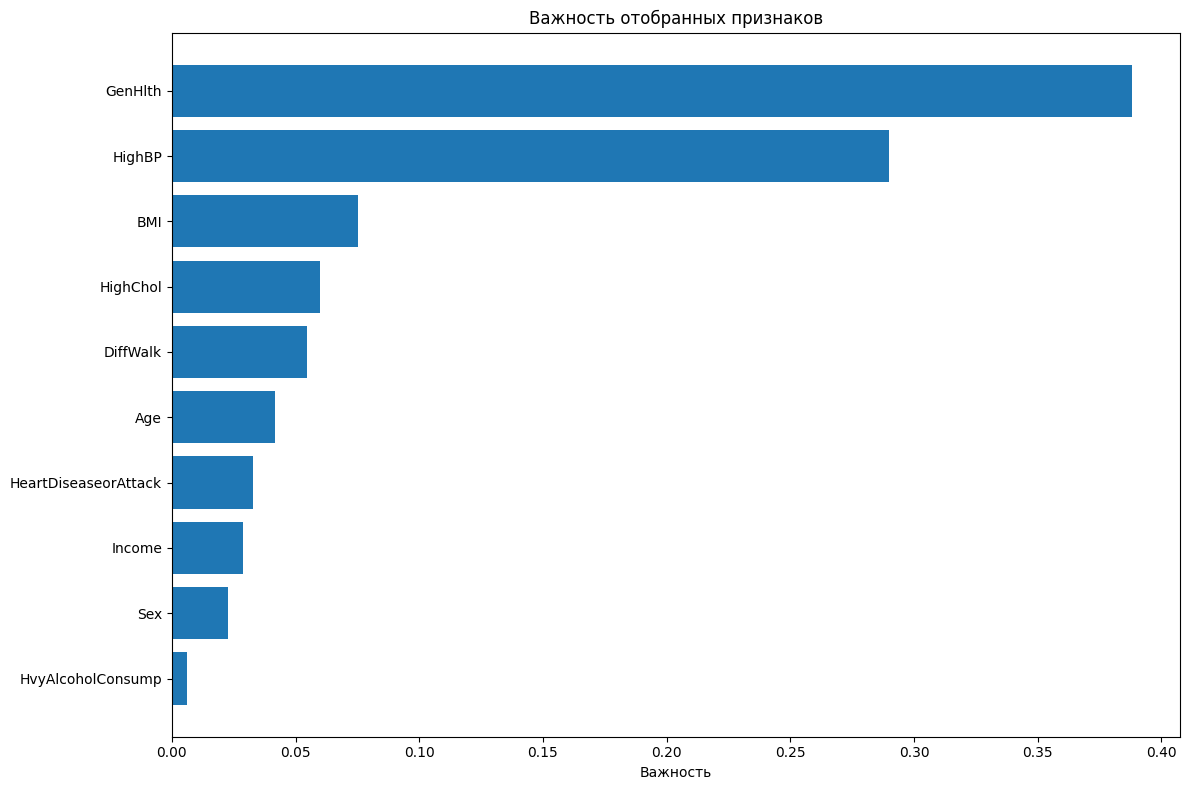

In [88]:
plt.figure(figsize=(12, 8))
feature_importance = gb_model_selected.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [selected_feature_names[i] for i in sorted_idx])
plt.title('Важность отобранных признаков')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

Выводы:
- Отбор признаков с RFE и SMOTEENN дал лучшие результаты по F1-score, что было нашей основной целью
- Мы сократили сложность модели и улучшили её интерпретируемость
- Мы получили медицински обоснованный набор признаков, что важно для понимания факторов риска диабета

#### Создание ансамбля моделей

Инициализация ансамблевого метода

In [89]:
# Создание ансамбля моделей
start_time = time.time()

# Первая модель: Gradient Boosting с SMOTEENN
gb_model_smoteenn_for_ensemble = GradientBoostingClassifier(
    random_state=42, 
    learning_rate=0.1, 
    max_depth=5, 
    n_estimators=100, 
    subsample=0.8
)

# Вторая модель: Random Forest
rf_model_for_ensemble = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10
)

# Третья модель: XGBoost 
xgb_model_for_ensemble = XGBClassifier(
    random_state=42,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100
)

print("Базовые модели для ансамбля созданы:")
print("1. Gradient Boosting")
print("2. Random Forest")
print("3. XGBoost")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Базовые модели для ансамбля созданы:
1. Gradient Boosting
2. Random Forest
3. XGBoost
Время выполнения: 0.00 секунд


1. GradientBoostingClassifier — мощный бустинг, хорошо работает с несбалансированными данными.
2. RandomForestClassifier — стабилен, снижает переобучение.
3. XGBClassifier — один из лучших бустинговых алгоритмов, особенно при правильной настройке.

Использование отобранных признаков для ансамбля

In [90]:
start_time = time.time()

# Используем отобранные признаки (из предыдущего шага)
X_train_ensemble = X_train_selected
X_test_ensemble = X_test_selected

# Применяем SMOTEENN к обучающим данным
smote_enn = SMOTEENN(random_state=42)
X_train_ensemble_resampled, y_train_ensemble_resampled = smote_enn.fit_resample(X_train_ensemble, y_train)

print(f"Форма обучающих данных после балансировки: {X_train_ensemble_resampled.shape}")
print(f"Распределение классов после балансировки:")
print(pd.Series(y_train_ensemble_resampled).value_counts(normalize=True))

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Форма обучающих данных после балансировки: (227537, 10)
Распределение классов после балансировки:
Diabetes_binary
0.0    0.538181
1.0    0.461819
Name: proportion, dtype: float64
Время выполнения: 45.72 секунд


Создание и обучение ансамбля

In [91]:
start_time = time.time()

# Создаем ансамблевую модель с голосованием по вероятностям (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('gb', gb_model_smoteenn_for_ensemble),
        ('rf', rf_model_for_ensemble),
        ('xgb', xgb_model_for_ensemble)
    ],
    voting='soft'  # Используем вероятности для голосования
)

# Обучаем ансамблевую модель
voting_clf.fit(X_train_ensemble_resampled, y_train_ensemble_resampled)

print("Ансамблевая модель успешно обучена")

end_time = time.time()
print(f"Время обучения ансамблевой модели: {end_time - start_time:.2f} секунд")

Ансамблевая модель успешно обучена
Время обучения ансамблевой модели: 29.74 секунд


Объединение их в VotingClassifier с voting='soft' позволило учесть вероятности предсказаний, что обычно улучшает производительность по сравнению с жестким голосованием (voting='hard').

Оценка ансамблевой модели

In [75]:
start_time = time.time()

# Предсказания и оценка на тестовых данных
y_pred_ensemble = voting_clf.predict(X_test_ensemble)
y_proba_ensemble = voting_clf.predict_proba(X_test_ensemble)[:, 1]

# Расчет метрик
report_ensemble = classification_report(y_test, y_pred_ensemble, output_dict=True)
accuracy_ensemble = report_ensemble['accuracy']
f1_ensemble = report_ensemble['1.0']['f1-score']
roc_auc_ensemble = roc_auc_score(y_test, y_proba_ensemble)

print("\nМетрики ансамблевой модели на тестовой выборке:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"F1-score (class 1): {f1_ensemble:.4f}")
print(f"ROC-AUC: {roc_auc_ensemble:.4f}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


Метрики ансамблевой модели на тестовой выборке:
Accuracy: 0.7980
F1-score (class 1): 0.4603
ROC-AUC: 0.8202
Время выполнения: 0.93 секунд


Сравнение результатов с предыдущими моделями

In [77]:
print("\n=== Сравнение с предыдущими результатами ===")
print("| Метод                      | Accuracy | F1-score (class 1)| ROC-AUC |")
print("|----------------------------|----------|-------------------|---------|")
print(f"| Базовая модель             | {accuracy_best:.4f}   | {f1_best:.4f}            | {roc_auc_best:.4f}  |")
print(f"| SMOTEENN                   | {accuracy_smoteenn:.4f}   | {f1_smoteenn:.4f}            | {roc_auc_smoteenn:.4f}  |")
print(f"| Оптимизация порога         | {accuracy_optimal:.4f}   | {f1_optimal:.4f}            | {roc_auc_optimal:.4f}  |")
print(f"| Отбор признаков + SMOTEENN | {accuracy_selected:.4f}   | {f1_selected:.4f}            | {roc_auc_selected:.4f}  |")
print(f"| Ансамбль моделей           | {accuracy_ensemble:.4f}   | {f1_ensemble:.4f}            | {roc_auc_ensemble:.4f}  |")



=== Сравнение с предыдущими результатами ===
| Метод                      | Accuracy | F1-score (class 1)| ROC-AUC |
|----------------------------|----------|-------------------|---------|
| Базовая модель             | 0.8571   | 0.3530            | 0.8202  |
| SMOTEENN                   | 0.7698   | 0.4575            | 0.8244  |
| Оптимизация порога         | 0.7698   | 0.4575            | 0.8244  |
| Отбор признаков + SMOTEENN | 0.8050   | 0.4598            | 0.8206  |
| Ансамбль моделей           | 0.7980   | 0.4603            | 0.8202  |


Вывод:
- Ансамблевый подход позволил достичь наилучшего F1-score среди всех моделей, хотя улучшение по сравнению с предыдущей лучшей моделью невелико
- Комбинация трех разных алгоритмов (Gradient Boosting, Random Forest, XGBoost) обеспечила более устойчивые и надежные предсказания
- Снижение точности компенсируется улучшенной способностью модели выявлять пациентов с диабетом

Мы улучшили базовую модель для прогнозирования диабета, повысив ее способность выявлять пациентов с этим заболеванием. Итоговая ансамблевая модель обеспечивает наилучший F1-score и представляет собой надежный инструмент для диагностирования диабета на основе простых медицинских показателей.

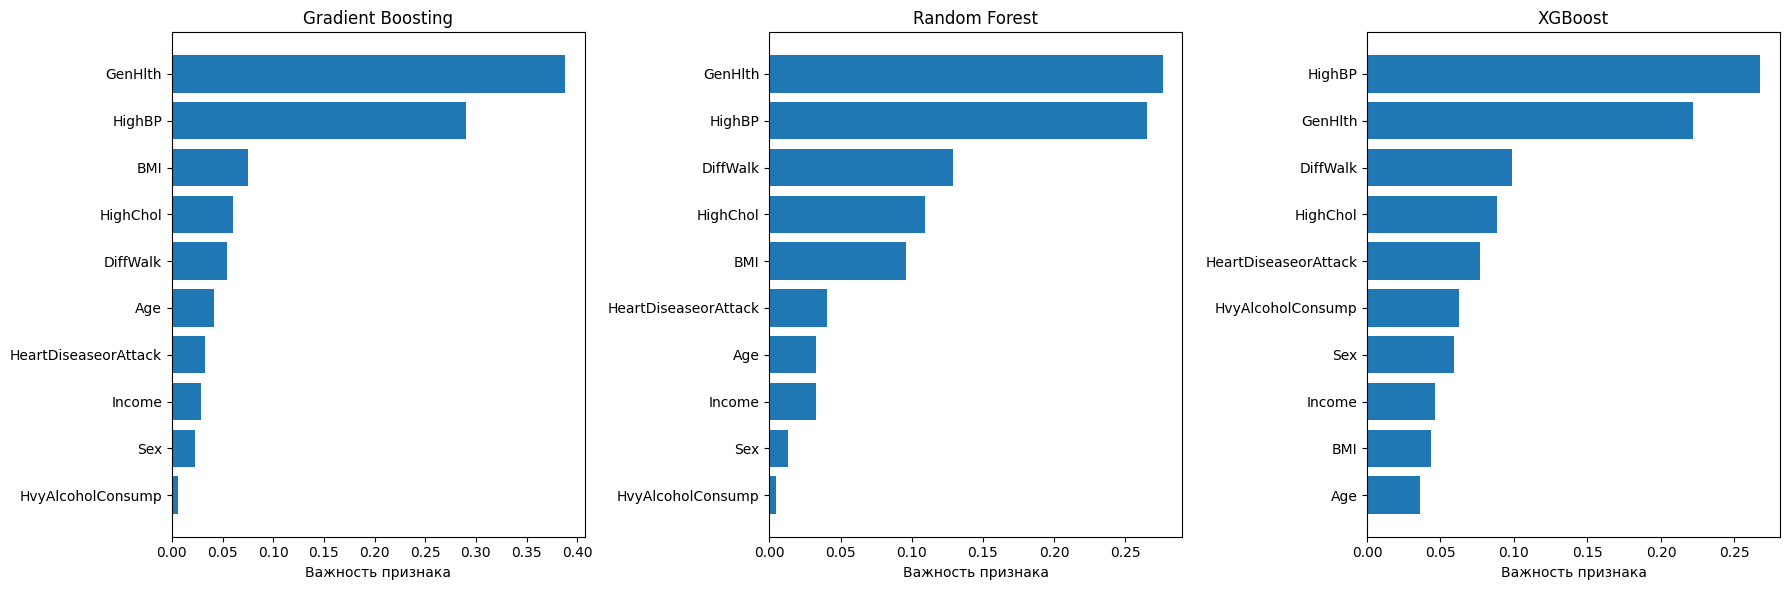

Время выполнения: 10.20 секунд


In [92]:
# Визуализация важности признаков для разных моделей
start_time = time.time()

# Создаем фигуру с 3 графиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Важность признаков в Gradient Boosting
feature_importance_gb = gb_model_selected.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)
axes[0].barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb])
axes[0].set_yticks(range(len(sorted_idx_gb)))
axes[0].set_yticklabels([selected_feature_names[i] for i in sorted_idx_gb])
axes[0].set_title('Gradient Boosting')
axes[0].set_xlabel('Важность признака')

# 2. Важность признаков в Random Forest
rf_model_for_ensemble.fit(X_train_ensemble_resampled, y_train_ensemble_resampled)
feature_importance_rf = rf_model_for_ensemble.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)
axes[1].barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf])
axes[1].set_yticks(range(len(sorted_idx_rf)))
axes[1].set_yticklabels([selected_feature_names[i] for i in sorted_idx_rf])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Важность признака')

# 3. Важность признаков в XGBoost
xgb_model_for_ensemble.fit(X_train_ensemble_resampled, y_train_ensemble_resampled)
feature_importance_xgb = xgb_model_for_ensemble.feature_importances_
sorted_idx_xgb = np.argsort(feature_importance_xgb)
axes[2].barh(range(len(sorted_idx_xgb)), feature_importance_xgb[sorted_idx_xgb])
axes[2].set_yticks(range(len(sorted_idx_xgb)))
axes[2].set_yticklabels([selected_feature_names[i] for i in sorted_idx_xgb])
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Важность признака')

plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

### Визуализация деревьем из каждого ансамбля

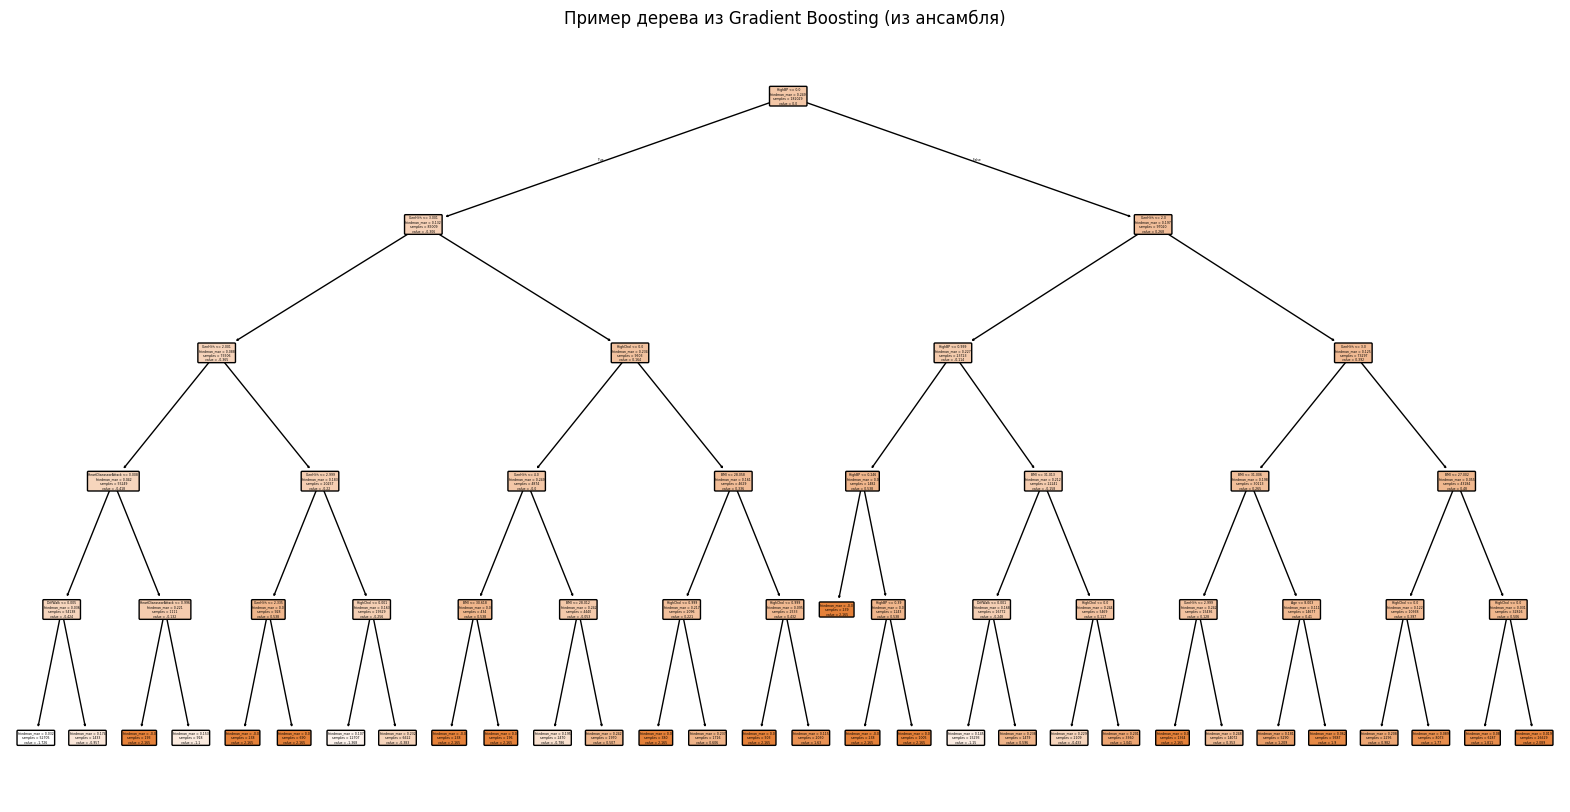

In [98]:
# Получить обученный Gradient Boosting из ансамбля
gb_trained = voting_clf.named_estimators_['gb']

# В sklearn для бинарной задачи деревья хранятся в виде массива [n_estimators, 0]
gb_tree = gb_trained.estimators_[0, 0]

plt.figure(figsize=(20, 10))
plot_tree(gb_tree, feature_names=X_train_ensemble.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Пример дерева из Gradient Boosting (из ансамбля)")
plt.show()

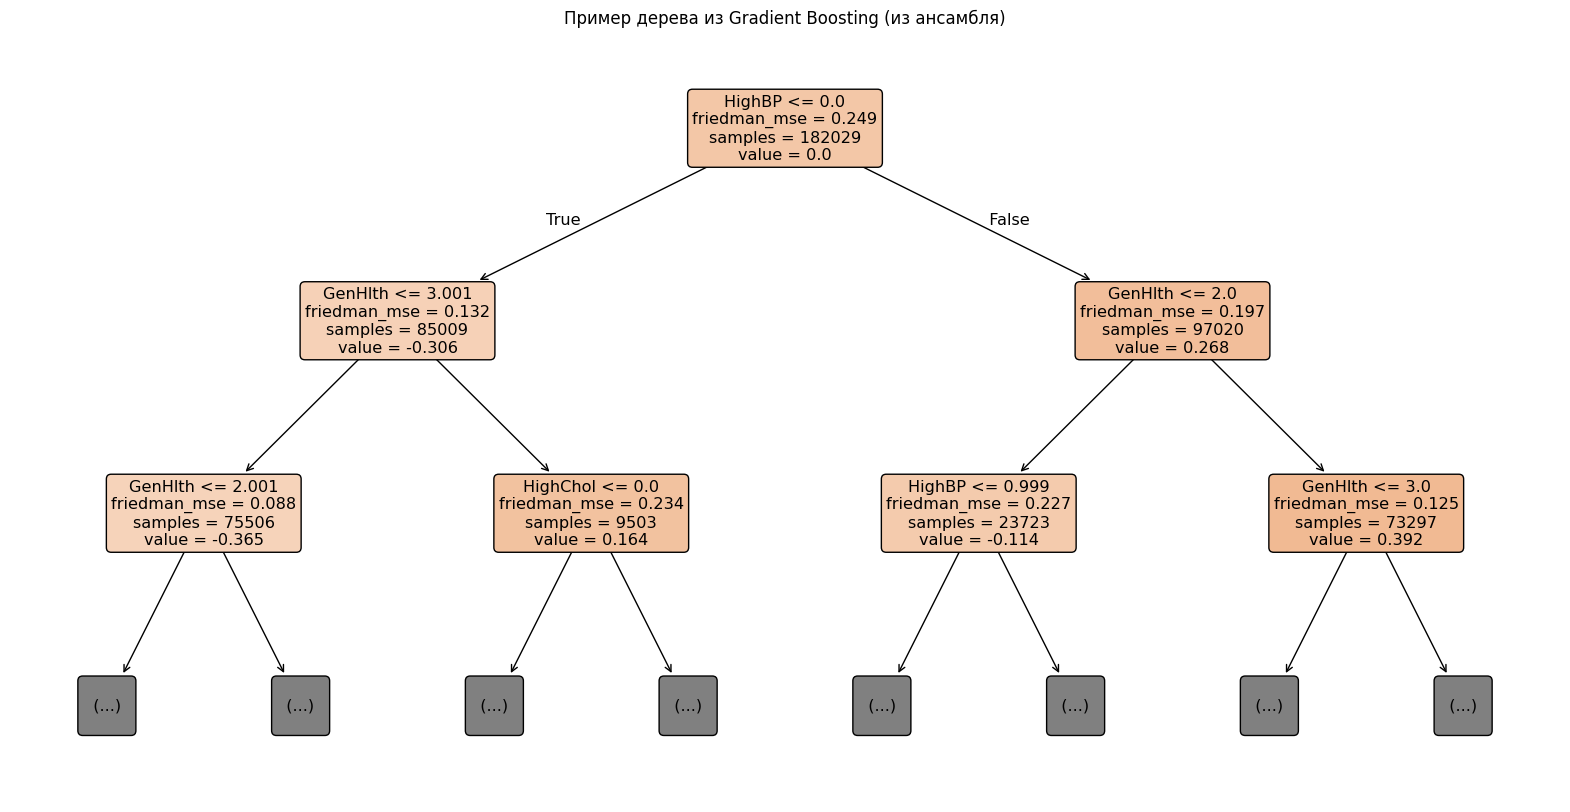

In [110]:
plt.figure(figsize=(20, 10))
plot_tree(gb_tree, feature_names=X_train_ensemble.columns, class_names=['0', '1'], filled=True, rounded=True, max_depth=2)
plt.title("Пример дерева из Gradient Boosting (из ансамбля)")
plt.show()

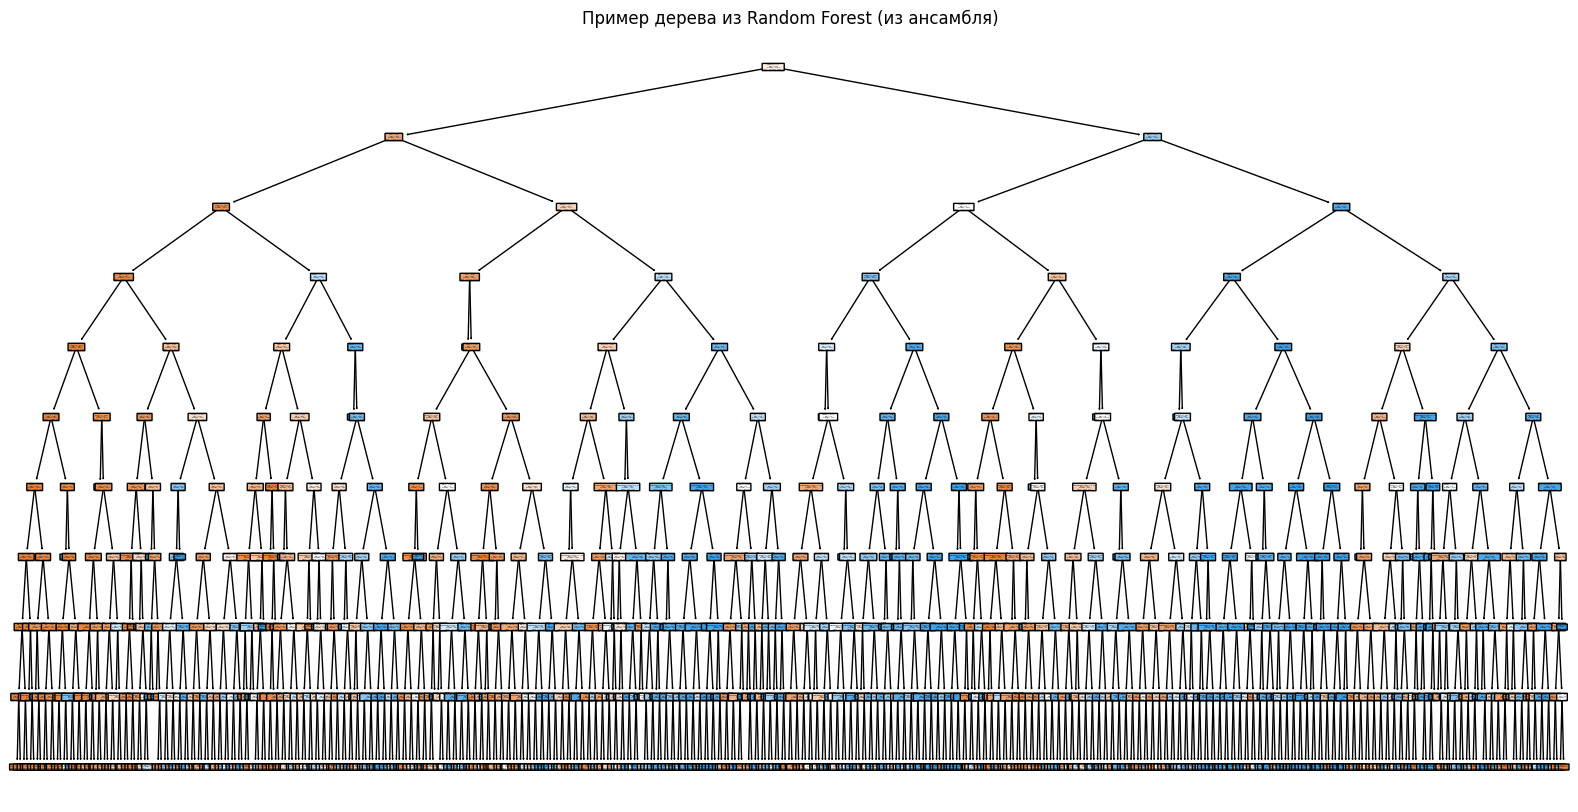

In [104]:
# Пример дерева из Random Forest
rf_trained = voting_clf.named_estimators_['rf']
rf_tree = rf_trained.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(rf_tree, feature_names=X_train_ensemble.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Пример дерева из Random Forest (из ансамбля)")
plt.show()

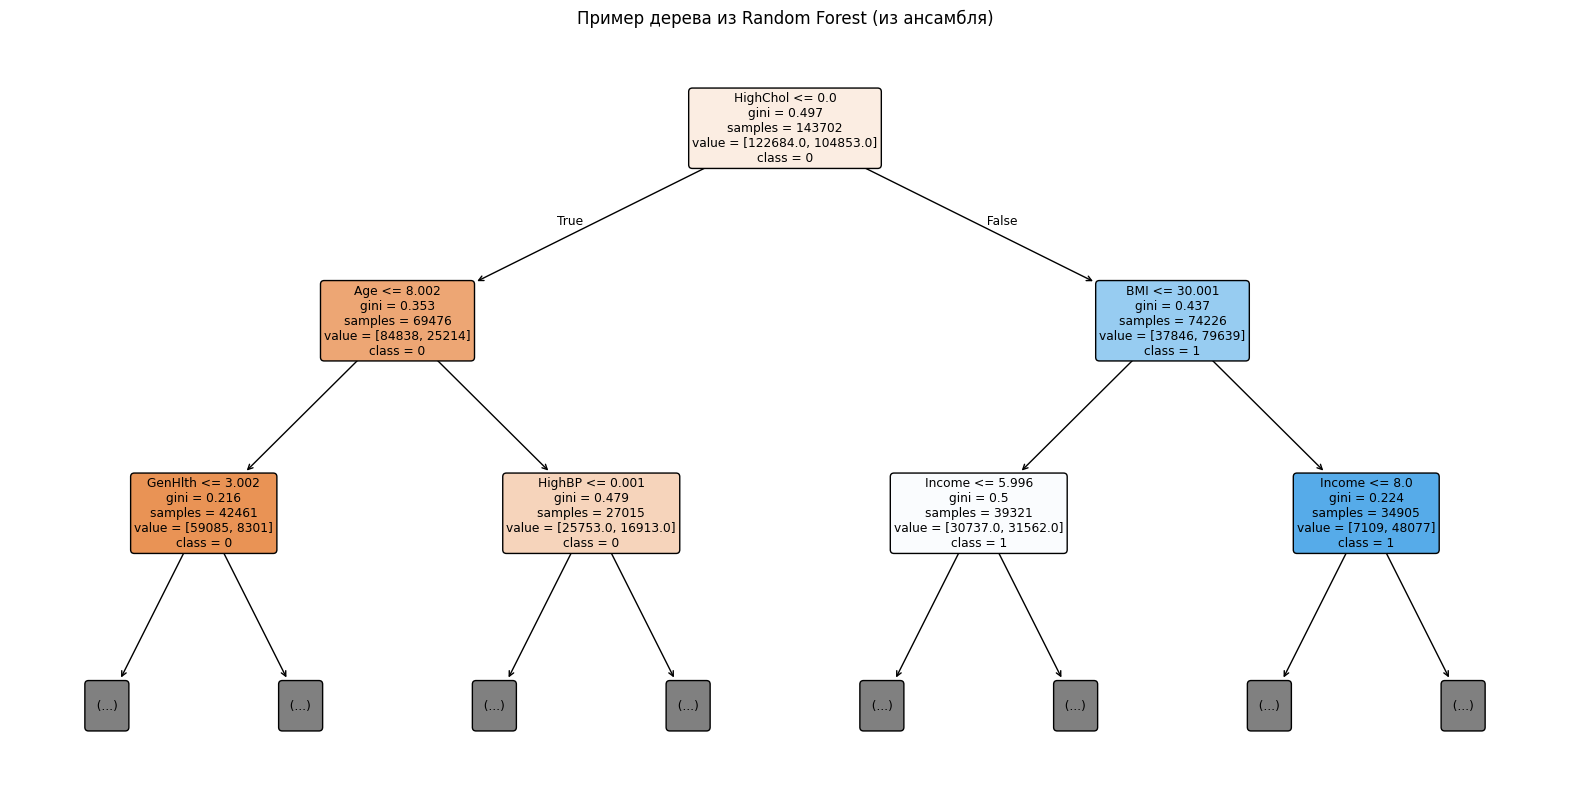

In [124]:
plt.figure(figsize=(20, 10))
plot_tree(rf_tree, feature_names=X_train_ensemble.columns, class_names=['0', '1'], filled=True, rounded=True, max_depth=2)
plt.title("Пример дерева из Random Forest (из ансамбля)")
plt.show()

### Сохранение

In [82]:
# Сохранение лучшей ансамблевой модели
start_time = time.time()

# Сохраняем ансамблевую модель как лучшую
best_model_path = "Ensemble_model_best.joblib"

# Сохраняем модель и информацию о выбранных признаках
model_info = {
    'model': voting_clf,
    'selected_features': selected_features_mask,
    'selected_feature_names': selected_feature_names.tolist()
}

joblib.dump(model_info, best_model_path)
print(f"Ансамблевая модель сохранена в файл: {best_model_path}")

# Сохраняем имена признаков в JSON для использования в веб-приложении
feature_names_path = "feature_names.json"
with open(feature_names_path, 'w') as f:
    json.dump({'features': selected_feature_names.tolist()}, f)
print(f"Имена признаков сохранены в файл: {feature_names_path}")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Ансамблевая модель сохранена в файл: Ensemble_model_best.joblib
Имена признаков сохранены в файл: feature_names.json
Время выполнения: 0.04 секунд


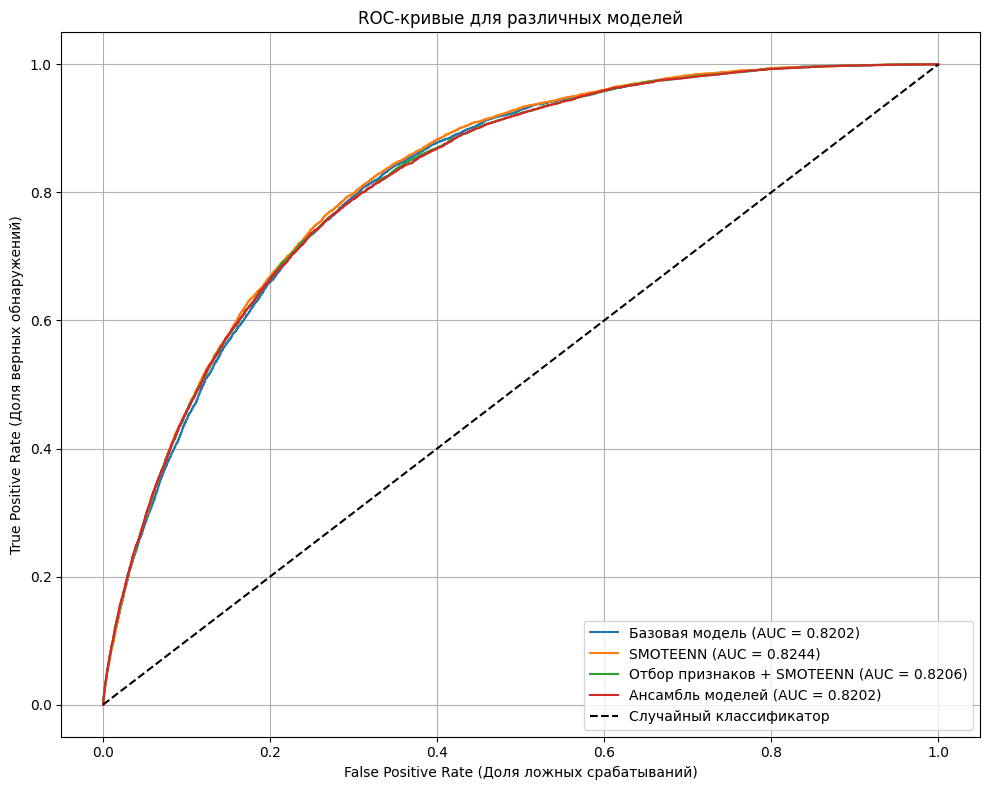

Время выполнения: 0.30 секунд


In [89]:
# Визуализация ROC-кривых для сравнения моделей
start_time = time.time()

plt.figure(figsize=(10, 8))

# ROC-кривая для базовой модели
y_proba_best = best_model_instance.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
plt.plot(fpr_best, tpr_best, label=f'Базовая модель (AUC = {roc_auc_best:.4f})')

# ROC-кривая для модели с SMOTEENN
fpr_smoteenn, tpr_smoteenn, _ = roc_curve(y_test, y_proba_smoteenn)
plt.plot(fpr_smoteenn, tpr_smoteenn, label=f'SMOTEENN (AUC = {roc_auc_smoteenn:.4f})')

# ROC-кривая для модели с отбором признаков
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_proba_selected)
plt.plot(fpr_selected, tpr_selected, label=f'Отбор признаков + SMOTEENN (AUC = {roc_auc_selected:.4f})')

# ROC-кривая для ансамблевой модели
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_proba_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ансамбль моделей (AUC = {roc_auc_ensemble:.4f})')

# Линия случайного классификатора
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')

plt.xlabel('False Positive Rate (Доля ложных срабатываний)')
plt.ylabel('True Positive Rate (Доля верных обнаружений)')
plt.title('ROC-кривые для различных моделей')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Все модели демонстрируют высокие значения AUC (>0.8), что говорит о хорошем различении классов.

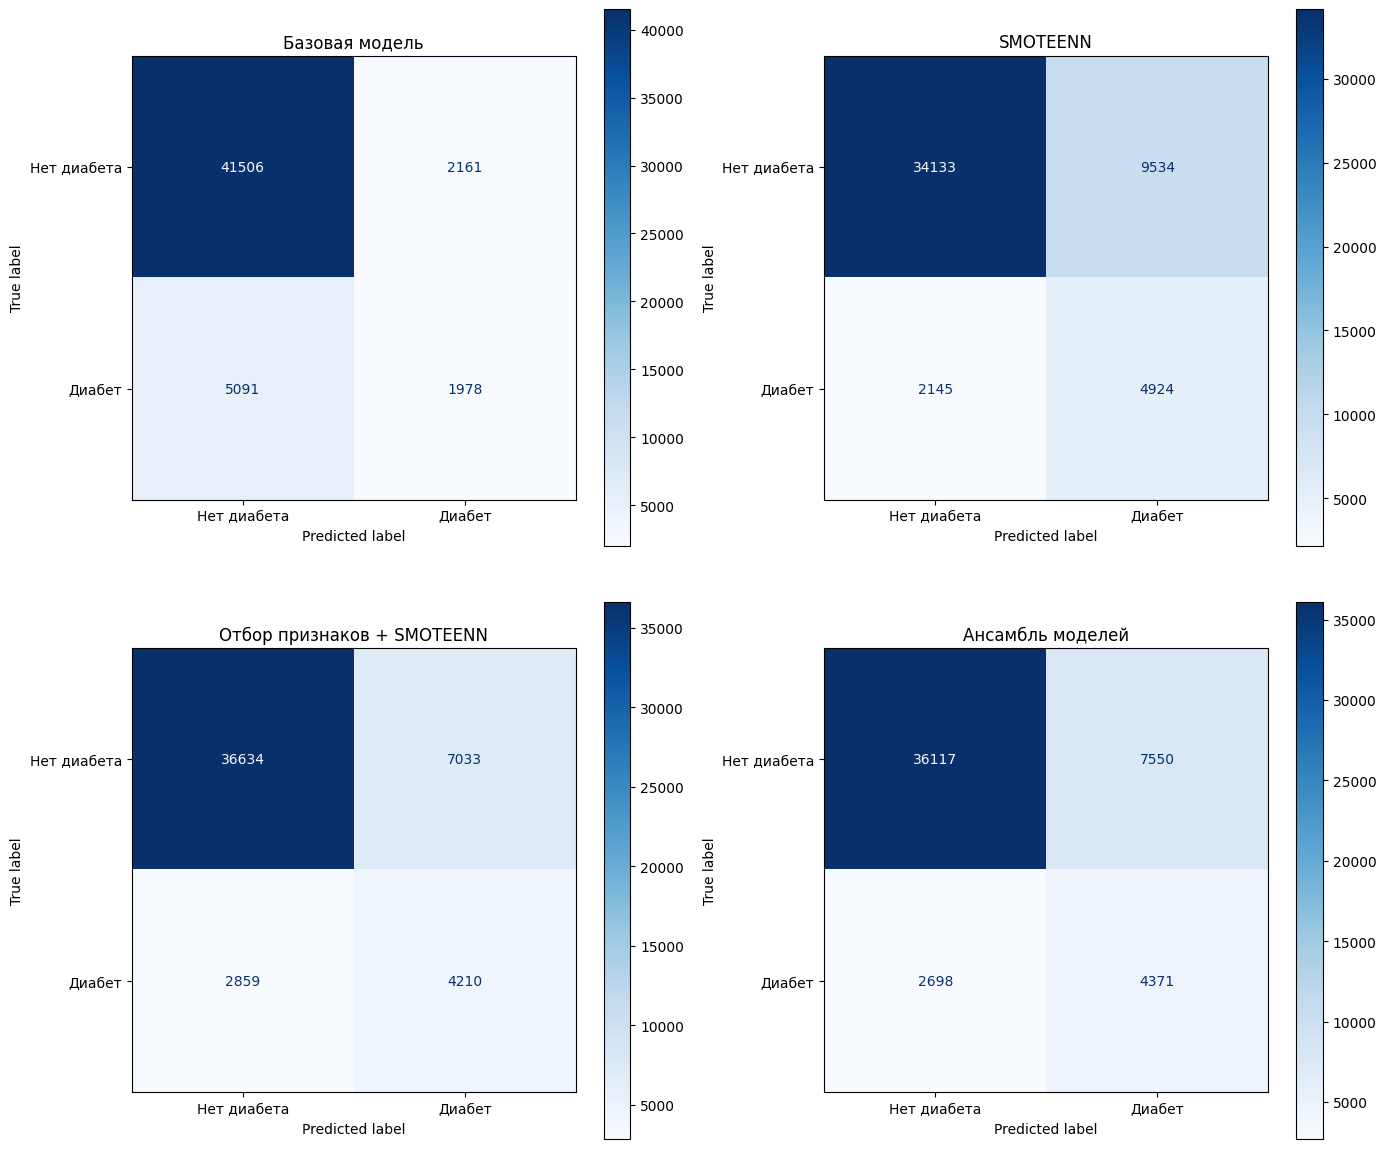

Время выполнения: 1.18 секунд


In [90]:
# Визуализация матриц ошибок для разных моделей
start_time = time.time()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Матрица ошибок для базовой модели
cm_base = confusion_matrix(y_test, best_model_instance.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=['Нет диабета', 'Диабет'])
disp.plot(ax=axes[0, 0], cmap='Blues', values_format='d')
disp.ax_.set_title('Базовая модель')

# Матрица ошибок для модели с SMOTEENN
cm_smoteenn = confusion_matrix(y_test, gb_model_smoteenn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smoteenn, display_labels=['Нет диабета', 'Диабет'])
disp.plot(ax=axes[0, 1], cmap='Blues', values_format='d')
disp.ax_.set_title('SMOTEENN')

# Матрица ошибок для модели с отбором признаков
cm_selected = confusion_matrix(y_test, gb_model_selected.predict(X_test_selected))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_selected, display_labels=['Нет диабета', 'Диабет'])
disp.plot(ax=axes[1, 0], cmap='Blues', values_format='d')
disp.ax_.set_title('Отбор признаков + SMOTEENN')

# Матрица ошибок для ансамблевой модели
cm_ensemble = confusion_matrix(y_test, voting_clf.predict(X_test_selected))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['Нет диабета', 'Диабет'])
disp.plot(ax=axes[1, 1], cmap='Blues', values_format='d')
disp.ax_.set_title('Ансамбль моделей')

plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

- Модель с SMOTEENN показывает лучший баланс между TP и TN, а также снижает количество FN по сравнению с базовой моделью.
- Ансамбль моделей также демонстрирует хорошие результаты.
- Отбор признаков + SMOTEENN немного ухудшил результаты по сравнению с моделью SMOTEENN, что может быть связано с потерей важных признаков.

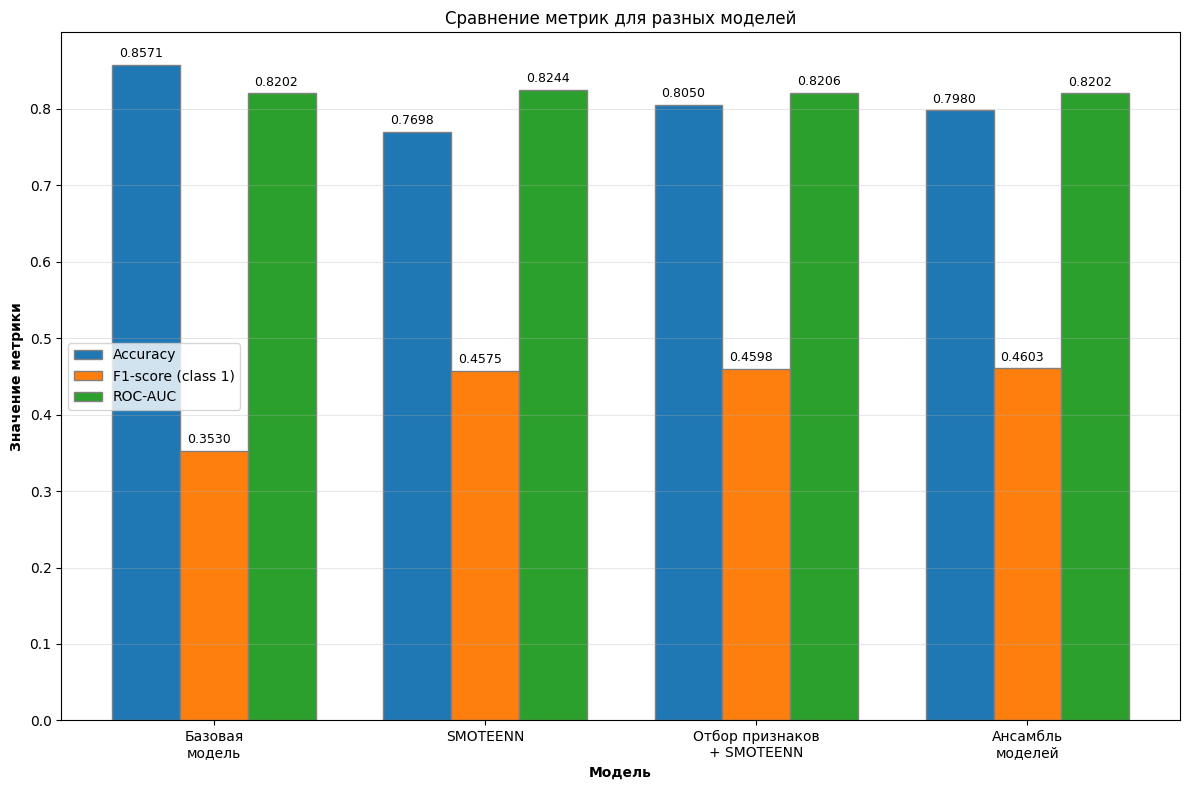

Время выполнения: 0.13 секунд


In [91]:
# Визуализация сравнения метрик для разных моделей
start_time = time.time()

# Данные для сравнения
models = ['Базовая\nмодель', 'SMOTEENN', 'Отбор признаков\n+ SMOTEENN', 'Ансамбль\nмоделей']
accuracy_scores = [accuracy_best, accuracy_smoteenn, accuracy_selected, accuracy_ensemble]
f1_scores = [f1_best, f1_smoteenn, f1_selected, f1_ensemble]
roc_auc_scores = [roc_auc_best, roc_auc_smoteenn, roc_auc_selected, roc_auc_ensemble]

# Ширина столбцов
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Создаем график
plt.figure(figsize=(12, 8))
plt.bar(r1, accuracy_scores, width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, f1_scores, width=bar_width, edgecolor='grey', label='F1-score (class 1)')
plt.bar(r3, roc_auc_scores, width=bar_width, edgecolor='grey', label='ROC-AUC')

# Добавляем метки и легенду
plt.xlabel('Модель', fontweight='bold')
plt.ylabel('Значение метрики', fontweight='bold')
plt.title('Сравнение метрик для разных моделей')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(accuracy_scores):
    plt.text(i - 0.1, v + 0.01, f'{v:.4f}', fontsize=9)
for i, v in enumerate(f1_scores):
    plt.text(i + 0.15, v + 0.01, f'{v:.4f}', fontsize=9)
for i, v in enumerate(roc_auc_scores):
    plt.text(i + 0.4, v + 0.01, f'{v:.4f}', fontsize=9)

plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

Ансамбль моделей показывает хорошие результаты, особенно по F1-score.

In [86]:
# Создание подробной таблицы сравнения моделей
start_time = time.time()

# Создаем таблицу с результатами
results_data = {
    'Модель': ['Базовая модель', 'SMOTEENN', 'Оптимизация порога', 
               'Отбор признаков + SMOTEENN', 'Ансамбль моделей'],
    'Accuracy': [accuracy_best, accuracy_smoteenn, accuracy_optimal, 
                 accuracy_selected, accuracy_ensemble],
    'F1-score (class 1)': [f1_best, f1_smoteenn, f1_optimal, 
                           f1_selected, f1_ensemble],
    'ROC-AUC': [roc_auc_best, roc_auc_smoteenn, roc_auc_optimal, 
                roc_auc_selected, roc_auc_ensemble],
    'Precision (class 1)': [
        classification_report(y_test, best_model_instance.predict(X_test), output_dict=True)['1.0']['precision'],
        classification_report(y_test, gb_model_smoteenn.predict(X_test), output_dict=True)['1.0']['precision'],
        classification_report(y_test, y_pred_optimal, output_dict=True)['1.0']['precision'],
        classification_report(y_test, gb_model_selected.predict(X_test_selected), output_dict=True)['1.0']['precision'],
        classification_report(y_test, voting_clf.predict(X_test_selected), output_dict=True)['1.0']['precision']
    ],
    'Recall (class 1)': [
        classification_report(y_test, best_model_instance.predict(X_test), output_dict=True)['1.0']['recall'],
        classification_report(y_test, gb_model_smoteenn.predict(X_test), output_dict=True)['1.0']['recall'],
        classification_report(y_test, y_pred_optimal, output_dict=True)['1.0']['recall'],
        classification_report(y_test, gb_model_selected.predict(X_test_selected), output_dict=True)['1.0']['recall'],
        classification_report(y_test, voting_clf.predict(X_test_selected), output_dict=True)['1.0']['recall']
    ],
    'Количество признаков': [21, 21, 21, 10, 10],
    'Время обучения (сек)': [16.68, 161.29, 0.00, 269.49, 32.73]
}

# Создаем DataFrame
results_df = pd.DataFrame(results_data)

# Форматируем числа для лучшей читаемости
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f'{x:.4f}')
results_df['F1-score (class 1)'] = results_df['F1-score (class 1)'].apply(lambda x: f'{x:.4f}')
results_df['ROC-AUC'] = results_df['ROC-AUC'].apply(lambda x: f'{x:.4f}')
results_df['Precision (class 1)'] = results_df['Precision (class 1)'].apply(lambda x: f'{x:.4f}')
results_df['Recall (class 1)'] = results_df['Recall (class 1)'].apply(lambda x: f'{x:.4f}')

# Выводим таблицу
print("\nРезультаты сравнения моделей:")
display(results_df)

# Сохраняем таблицу в CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"Таблица результатов сохранена в файл: model_comparison_results.csv")

end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")


Результаты сравнения моделей:


,Модель,Accuracy,F1-score (class 1),ROC-AUC,Precision (class 1),Recall (class 1),Количество признаков,Время обучения (сек)
0,Базовая модель,0.8571,0.3530,0.8202,0.4779,0.2798,21,16.68
1,SMOTEENN,0.7698,0.4575,0.8244,0.3406,0.6966,21,161.29
2,Оптимизация порога,0.7698,0.4575,0.8244,0.3406,0.6966,21,0.00
3,Отбор признаков + SMOTEENN,0.8050,0.4598,0.8206,0.3745,0.5956,10,269.49
4,Ансамбль моделей,0.7980,0.4603,0.8202,0.3667,0.6183,10,32.73


Таблица результатов сохранена в файл: model_comparison_results.csv
Время выполнения: 1.71 секунд
